In [4]:
getwd()

[1] "/mnt/storage/r0776441/jupyternotebooks/Task1_scRNA-seq"

In [2]:
setwd("Task1_scRNA-seq")

In [157]:
options(stringsAsFactors=FALSE)

library(Seurat)
library(dplyr)
library(Matrix)
library(SCopeLoomR)
library(IRdisplay)
library(plyr)
library(patchwork)

### Select and download the data
In this research, I analyze the carotid atherosclerosis dataset from ***Vascular smooth muscle cell phenotype switching in carotid atherosclerosis*** ([Chou et al., 2022](https://www-sciencedirect-com.kuleuven.e-bronnen.be/science/article/pii/S2666350321000456)).

All data are available and downloaded from download the Broad Institute Single Cell portal at https://singlecell.broadinstitute.org/single_cell/study/SCP2019

Carotid plaque instability contributes to large vessel ischemic stroke. Although vascular smooth muscle cells (VSMCs) affect atherosclerotic growth and instability, no treatments aimed at improving VSMC function are available. Large genetic studies investigating atherosclerosis and carotid disease in relation to the risk of stroke have implicated polymorphisms at the HDAC9 locus. The HDAC9 protein has been shown to affect the VSMC phenotype; however, how this might affect carotid disease is unknown. The single nuclei RNA sequencing of human carotid tissue was done to identify cells expressing HDAC9 and specifically investigate the role of the HDAC9 in carotid atherosclerosis.

- `matrix.mtx` Contains the **expression** values (counts) for each cell in each gene.
- `barcodes.tsv` List of barcodes included in the matrix. These usually refer to **cells**.
- `genes.tsv` List of "genes" included in the matrix. 
- `MetaData.txt`  important information about the samples like biosample_id, cell_type, sex and so on.

In [53]:
dir('/mnt/storage/r0776441/jupyternotebooks/Task1_scRNA-seq')

[1] "barcodes.tsv" "genes.tsv"    "matrix.mtx"   "MetaData.txt"

###  Load the raw data (expression matrix)¶

In [54]:
# Read the file and format as expression matrix
expression_matrix <- Read10X(
  data.dir='/mnt/storage/r0776441/jupyternotebooks/Task1_scRNA-seq',
  unique.features = TRUE,
  strip.suffix = FALSE
)
dim(expression_matrix)

[1] 33694  6049

In this expression matrix, there are 33694 genes and 6049 cells

In [55]:
#inspect the top left corner of the expression matrix
expression_matrix[1:50,1:2]

50 x 2 sparse Matrix of class "dgCMatrix"
              AAACCCACAGACAAGC-1-0 AAACCCACAGAGGTAC-1-0
RP11-34P13.3                     .                    .
FAM138A                          .                    .
OR4F5                            .                    .
RP11-34P13.7                     .                    .
RP11-34P13.8                     .                    .
RP11-34P13.14                    .                    .
RP11-34P13.9                     .                    .
FO538757.3                       .                    .
FO538757.2                       .                    .
AP006222.2                       .                    .
RP5-857K21.15                    .                    .
RP4-669L17.2                     .                    .
RP4-669L17.10                    .                    .
OR4F29                           .                    .
RP5-857K21.4                     .                    .
RP5-857K21.2                     .                    .
OR4F16

### Create a Seurat object¶

We keep genes that are expressed in at least 20 cells, and cells that express at least 200 genes

In [58]:
seurat_object = CreateSeuratObject(counts = expression_matrix, min.cells = 20, min.features = 200)
seurat_object # Shows a summary of the object

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
16183 features across 6049 samples within 1 assay 
Active assay: RNA (16183 features, 0 variable features)

### Add meta data

In [63]:
cellMetadata <- read.delim('MetaData.txt')
head(cellMetadata)

NAME                 biosample_id                  donor_id
1 TYPE                 group                         group   
2 AAACCCACAGACAAGC-1-0 Symptomatic carotid plaque 1A 751     
3 AAACCCACAGAGGTAC-1-0 Symptomatic carotid plaque 1A 751     
4 AAACCCATCTTACTGT-1-0 Symptomatic carotid plaque 1A 751     
5 AAACGAATCAACGTGT-1-0 Symptomatic carotid plaque 1A 751     
6 AAACGCTAGTAGGCCA-1-0 Symptomatic carotid plaque 1A 751     
  celltype               sex    n_umi   n_genes percent_mito
1 group                  group  numeric numeric numeric     
2 Vascular Smooth Muscle female 3101.0  1674    0.0         
3 Vascular Smooth Muscle female 3652.0  1636    0.0         
4 Fibroblast             female 3802.0  1858    0.0         
5 Vascular Smooth Muscle female 2329.0  1245    0.0         
6 Vascular Smooth Muscle female 613.0   504     0.0         
  exon_prop           entropy            doublet_score       species       
1 numeric             numeric            numeric             group         
2 0.14770797962648557 7.6570849515091215 0.14736842105263157 NCBITaxon_9606
3 0.08878923766816144 7.344833780005036  0.16763005780346818 NCBITaxon_9606
4 0.17688625484385684 7.417955371102905  0.20677966101694914 NCBITaxon_9606
5 0.13153961136023917 7.347494849253513  0.08363636363636362 NCBITaxon_9606
6 0.12685560053981107 7.689891873870065  0.07936507936507936 NCBITaxon_9606
  species__ontology_label disease       disease__ontology_label organ         
1 group                   group         group                   group         
2 Homo sapiens            MONDO_0005269 carotid artery disorder UBERON_0001532
3 Homo sapiens            MONDO_0005269 carotid artery disorder UBERON_0001532
4 Homo sapiens            MONDO_0005269 carotid artery disorder UBERON_0001532
5 Homo sapiens            MONDO_0005269 carotid artery disorder UBERON_0001532
6 Homo sapiens            MONDO_0005269 carotid artery disorder UBERON_0001532
  organ__ontology_label   library_preparation_protocol
1 group                   group                       
2 internal carotid artery EFO_0009922                 
3 internal carotid artery EFO_0009922                 
4 internal carotid artery EFO_0009922                 
5 internal carotid artery EFO_0009922                 
6 internal carotid artery EFO_0009922                 
  library_preparation_protocol__ontology_label
1 group                                       
2 10x 3' v3                                   
3 10x 3' v3                                   
4 10x 3' v3                                   
5 10x 3' v3                                   
6 10x 3' v3

In [64]:
dim(cellMetadata)

[1] 6050   19

We only need some pecific columns: 'biosample_id', 'donor_id', 'celltype'

In [65]:
# Use cells as row names (easier subset)
rownames(cellMetadata) <- cellMetadata$NAME

# Select relevant annotations
cellMetadata <- cellMetadata[,c('biosample_id', 'donor_id', 'celltype')]

# Select cells in the seurat object
cellMetadata <- cellMetadata[Cells(seurat_object),]
dim(cellMetadata)

[1] 6049    3

In [66]:
head(cellMetadata)

biosample_id                  donor_id
AAACCCACAGACAAGC-1-0 Symptomatic carotid plaque 1A 751     
AAACCCACAGAGGTAC-1-0 Symptomatic carotid plaque 1A 751     
AAACCCATCTTACTGT-1-0 Symptomatic carotid plaque 1A 751     
AAACGAATCAACGTGT-1-0 Symptomatic carotid plaque 1A 751     
AAACGCTAGTAGGCCA-1-0 Symptomatic carotid plaque 1A 751     
AAACGCTCAAGAAACT-1-0 Symptomatic carotid plaque 1A 751     
                     celltype              
AAACCCACAGACAAGC-1-0 Vascular Smooth Muscle
AAACCCACAGAGGTAC-1-0 Vascular Smooth Muscle
AAACCCATCTTACTGT-1-0 Fibroblast            
AAACGAATCAACGTGT-1-0 Vascular Smooth Muscle
AAACGCTAGTAGGCCA-1-0 Vascular Smooth Muscle
AAACGCTCAAGAAACT-1-0 Vascular Smooth Muscle

In [67]:
seurat_object <- AddMetaData(seurat_object, metadata = cellMetadata)

In [68]:
head(seurat_object[[]])

orig.ident    nCount_RNA nFeature_RNA
AAACCCACAGACAAGC-1-0 SeuratProject 2263       1658        
AAACCCACAGAGGTAC-1-0 SeuratProject 1999       1626        
AAACCCATCTTACTGT-1-0 SeuratProject 2170       1840        
AAACGAATCAACGTGT-1-0 SeuratProject 1704       1240        
AAACGCTAGTAGGCCA-1-0 SeuratProject 1063        497        
AAACGCTCAAGAAACT-1-0 SeuratProject 1525       1206        
                     biosample_id                  donor_id
AAACCCACAGACAAGC-1-0 Symptomatic carotid plaque 1A 751     
AAACCCACAGAGGTAC-1-0 Symptomatic carotid plaque 1A 751     
AAACCCATCTTACTGT-1-0 Symptomatic carotid plaque 1A 751     
AAACGAATCAACGTGT-1-0 Symptomatic carotid plaque 1A 751     
AAACGCTAGTAGGCCA-1-0 Symptomatic carotid plaque 1A 751     
AAACGCTCAAGAAACT-1-0 Symptomatic carotid plaque 1A 751     
                     celltype              
AAACCCACAGACAAGC-1-0 Vascular Smooth Muscle
AAACCCACAGAGGTAC-1-0 Vascular Smooth Muscle
AAACCCATCTTACTGT-1-0 Fibroblast            
AAACGAATCAACGTGT-1-0 Vascular Smooth Muscle
AAACGCTAGTAGGCCA-1-0 Vascular Smooth Muscle
AAACGCTCAAGAAACT-1-0 Vascular Smooth Muscle

In [69]:
# Number of cells by batch:
cbind(table(seurat_object[['biosample_id']]))

[,1]
Asymptomatic carotid plaque 1A      1034
Asymptomatic carotid plaque 1B       551
Control disease free carotid tissue  444
Symptomatic carotid plaque 1A       2030
Symptomatic carotid plaque 1B       1990

In [70]:
save(seurat_object, file='seurat_object.RData')

###  Quality Control && Filtering


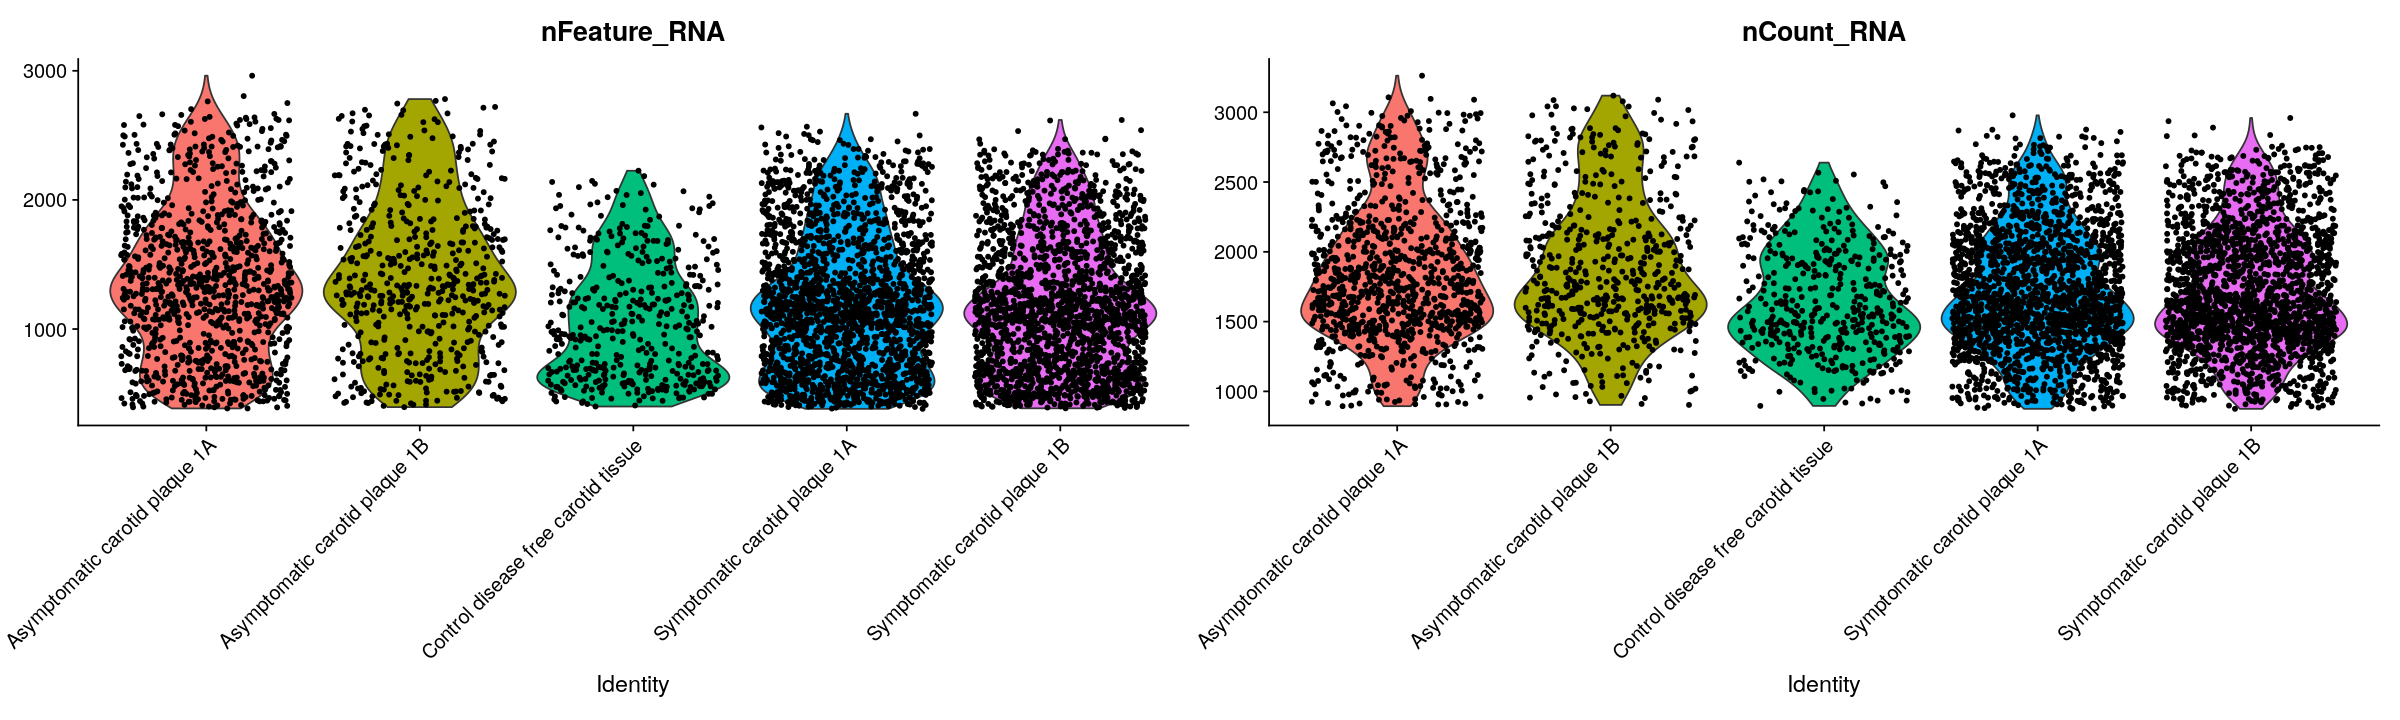

In [73]:
options(repr.plot.width=20, repr.plot.height=6) # To set the figure size
VlnPlot(object = seurat_object, features = c("nFeature_RNA", "nCount_RNA"), group.by = 'biosample_id', ncol = 2)

In [74]:
seurat_object[['AllData']] <- 'AllData'

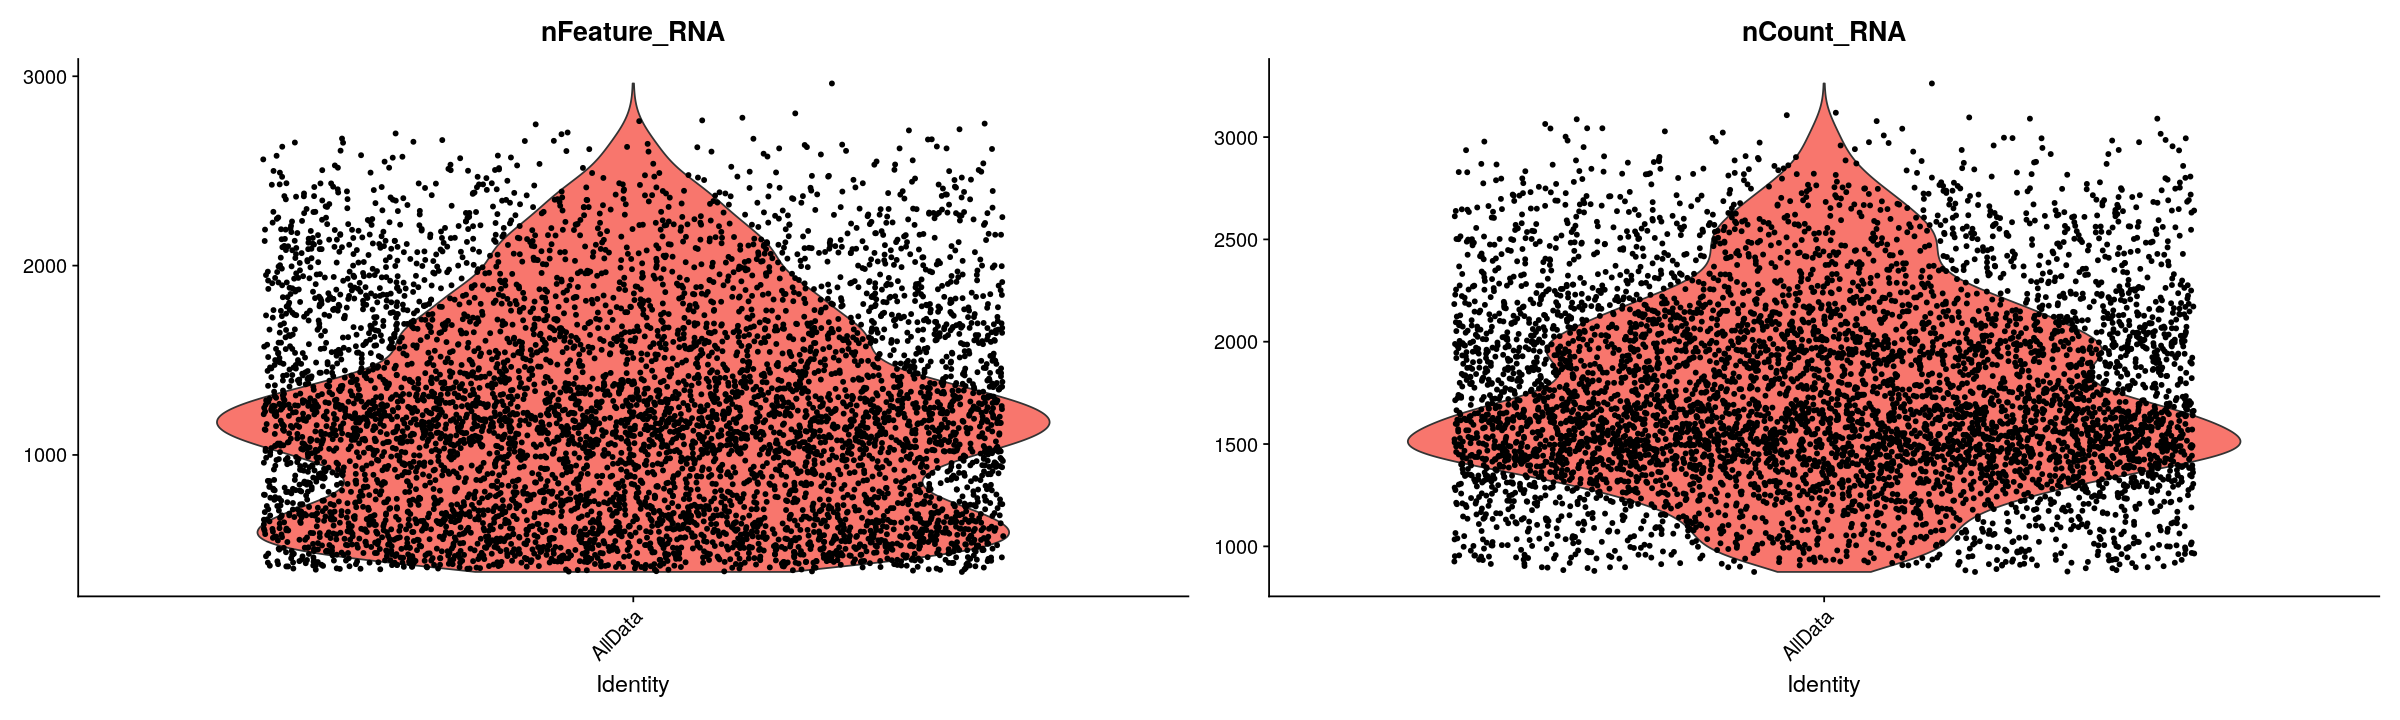

In [75]:
options(repr.plot.width=20, repr.plot.height=6) # To set the figure size
VlnPlot(object = seurat_object, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2, group.by='AllData')

In [76]:
# View values
summary(seurat_object@meta.data$nFeature_RNA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    382     765    1173    1229    1605    2962 

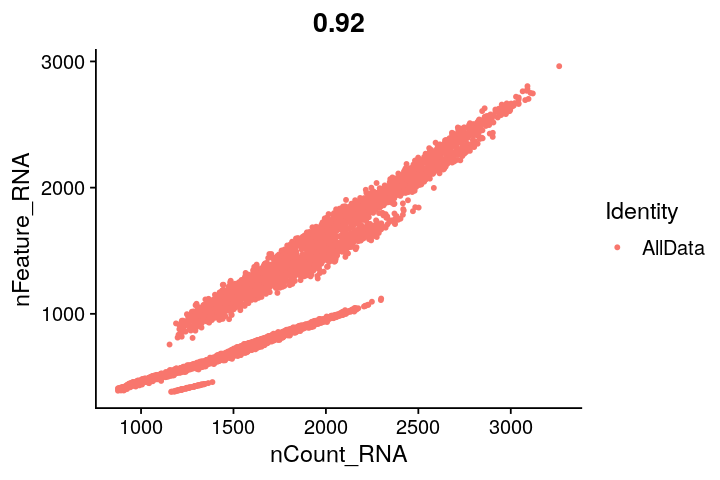

In [77]:
options(repr.plot.width=6, repr.plot.height=4)
FeatureScatter(object = seurat_object, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", group.by='AllData')

We can filter the cells with a minimun of 1000 features and maximum of 25000 counts

In [90]:
# Check number of cells that pass the filter:
subset(seurat_object, subset = nFeature_RNA > 1000 & nCount_RNA <= 3000)

An object of class Seurat 
16183 features across 3795 samples within 1 assay 
Active assay: RNA (16183 features, 0 variable features)

In [91]:
# Perform the filtering (i.e. store the returned object)
seurat_object <- subset(seurat_object, subset = nFeature_RNA >= 1000 & nCount_RNA <= 25000)

In [92]:
seurat_object

An object of class Seurat 
16183 features across 3815 samples within 1 assay 
Active assay: RNA (16183 features, 0 variable features)

Now only 3815 cells remained.

Check the distributions again.

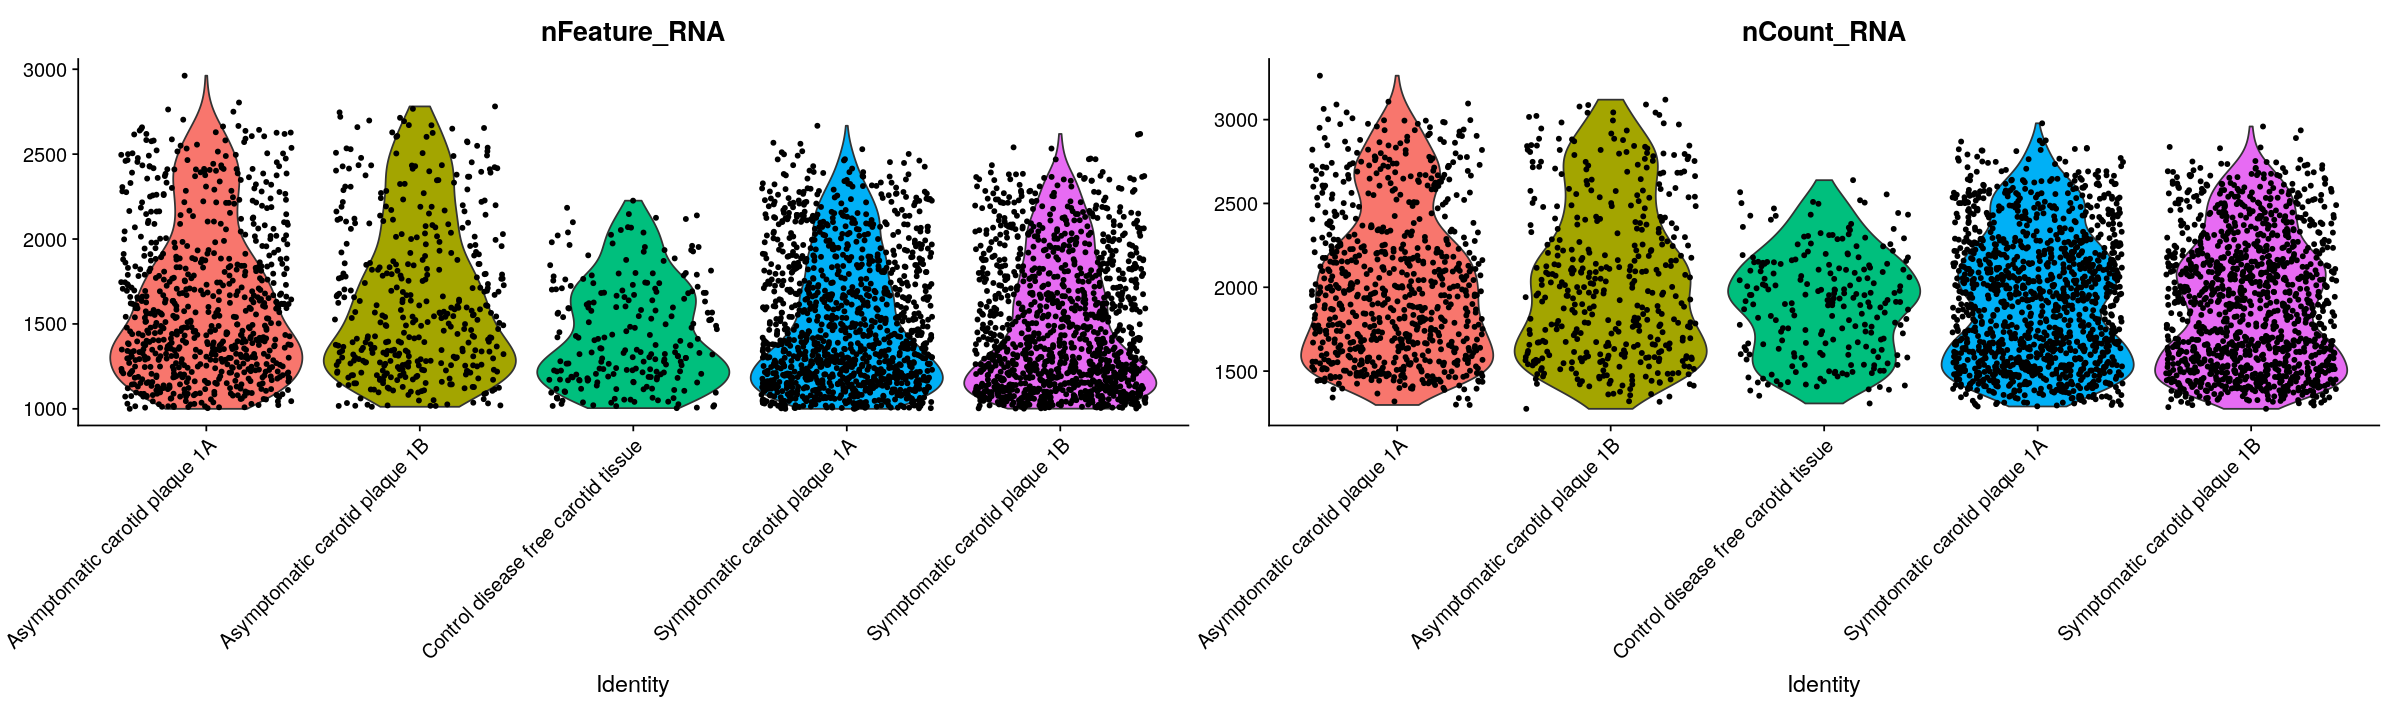

In [93]:
options(repr.plot.width=20, repr.plot.height=6)
VlnPlot(object = seurat_object, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2, group.by='biosample_id')

We can also use mitochondrial gene counts for quality control.

In [84]:
seurat_object[["percent.mt"]] <- PercentageFeatureSet(seurat_object, pattern = "^MT-")

In [85]:
summary(seurat_object[["percent.mt"]])

   percent.mt     
 Min.   :0.00000  
 1st Qu.:0.00000  
 Median :0.00000  
 Mean   :0.03634  
 3rd Qu.:0.04399  
 Max.   :0.82136  

In [86]:
head(seurat_object[[]])

orig.ident    nCount_RNA nFeature_RNA
AAACCCACAGACAAGC-1-0 SeuratProject 2263       1658        
AAACCCACAGAGGTAC-1-0 SeuratProject 1999       1626        
AAACCCATCTTACTGT-1-0 SeuratProject 2170       1840        
AAACGAATCAACGTGT-1-0 SeuratProject 1704       1240        
AAACGCTCAAGAAACT-1-0 SeuratProject 1525       1206        
AAACGCTGTGGTAATA-1-0 SeuratProject 1431       1102        
                     biosample_id                  donor_id
AAACCCACAGACAAGC-1-0 Symptomatic carotid plaque 1A 751     
AAACCCACAGAGGTAC-1-0 Symptomatic carotid plaque 1A 751     
AAACCCATCTTACTGT-1-0 Symptomatic carotid plaque 1A 751     
AAACGAATCAACGTGT-1-0 Symptomatic carotid plaque 1A 751     
AAACGCTCAAGAAACT-1-0 Symptomatic carotid plaque 1A 751     
AAACGCTGTGGTAATA-1-0 Symptomatic carotid plaque 1A 751     
                     celltype               AllData percent.mt
AAACCCACAGACAAGC-1-0 Vascular Smooth Muscle AllData 0         
AAACCCACAGAGGTAC-1-0 Vascular Smooth Muscle AllData 0         
AAACCCATCTTACTGT-1-0 Fibroblast             AllData 0         
AAACGAATCAACGTGT-1-0 Vascular Smooth Muscle AllData 0         
AAACGCTCAAGAAACT-1-0 Vascular Smooth Muscle AllData 0         
AAACGCTGTGGTAATA-1-0 Vascular Smooth Muscle AllData 0

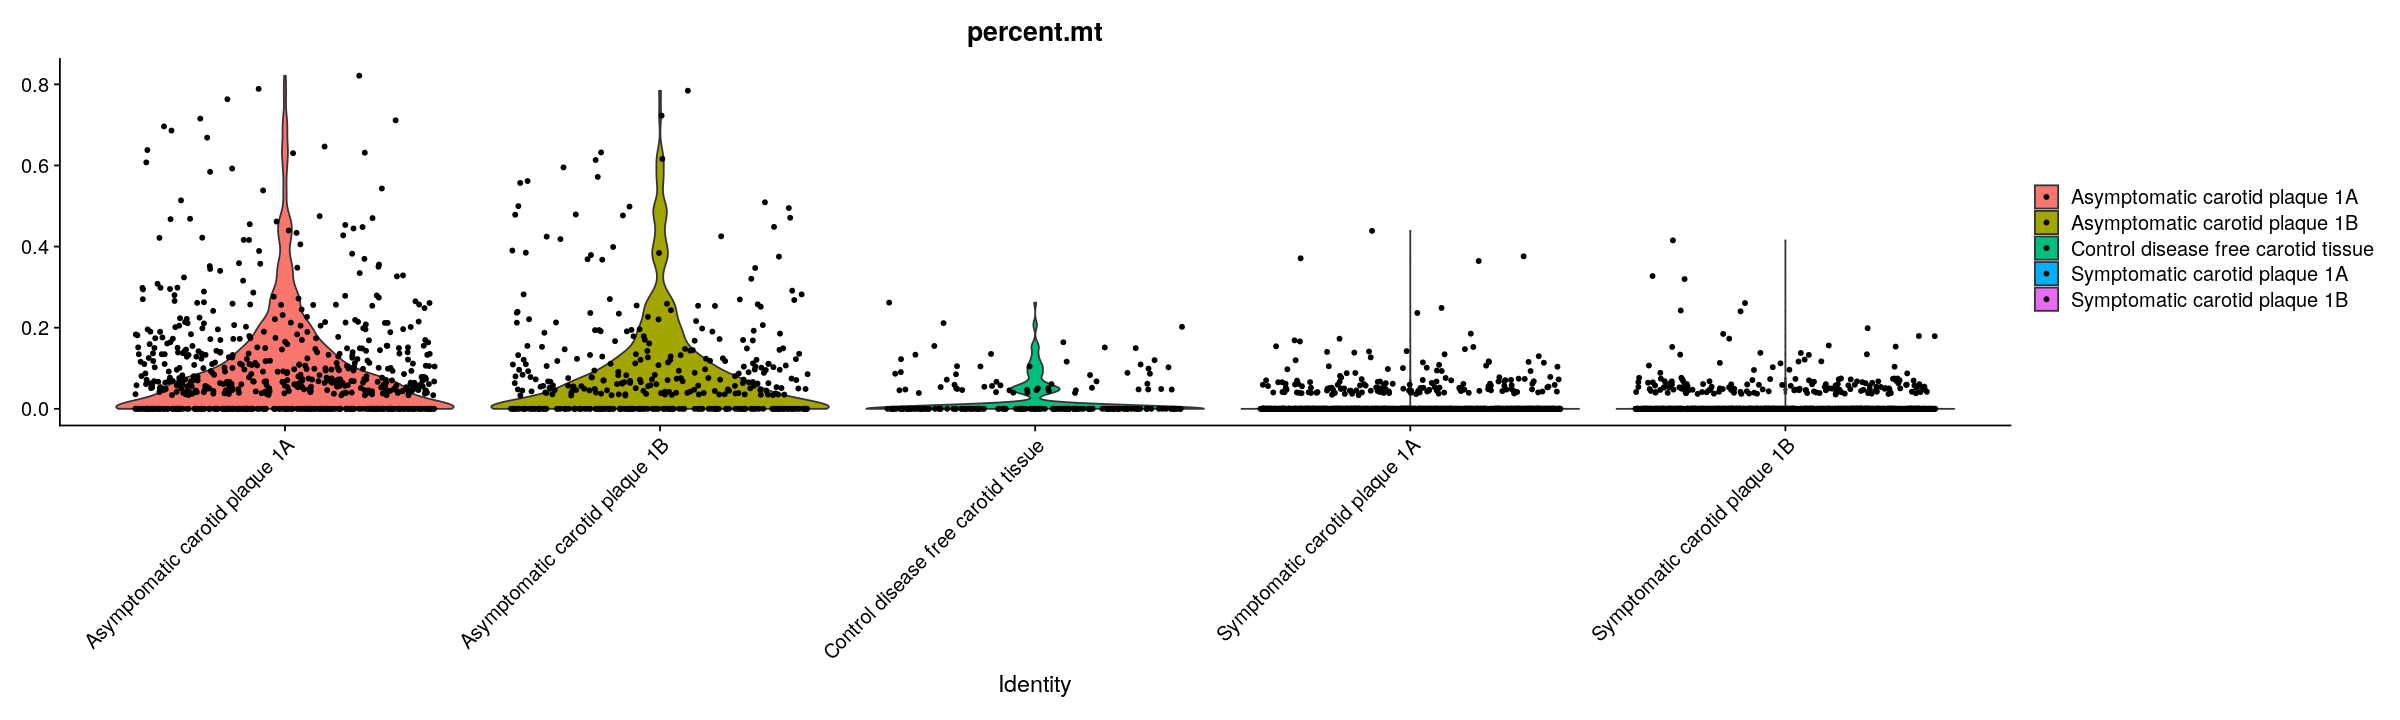

In [88]:
options(repr.plot.width=20, repr.plot.height=6)
VlnPlot(seurat_object, features = c("percent.mt"), group.by='biosample_id')

The maximum is less than 1, so all remaining data have high quality and pass the filter.

### Normalizing the data 

After removing unwanted cells from the dataset, the next step is to normalize the data.

In [94]:
seurat_object <- NormalizeData(seurat_object)

In [95]:
# seurat_object[["RNA"]]@data[1:5,1:5]
GetAssayData(seurat_object, slot="data")[1:5,1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
              AAACCCACAGACAAGC-1-0 AAACCCACAGAGGTAC-1-0 AAACCCATCTTACTGT-1-0
RP11-34P13.7                     .                    .                    .
FO538757.2                       .                    .                    .
AP006222.2                       .                    .                    .
RP4-669L17.10                    .                    .                    .
RP5-857K21.4                     .                    .                    .
              AAACGAATCAACGTGT-1-0 AAACGCTCAAGAAACT-1-0
RP11-34P13.7              .                           .
FO538757.2                .                           0
AP006222.2                .                           0
RP4-669L17.10             .                           .
RP5-857K21.4              1.926952                    .

In [96]:
# seurat_object[["RNA"]]@counts
GetAssayData(seurat_object, slot="counts")[1:5,1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
              AAACCCACAGACAAGC-1-0 AAACCCACAGAGGTAC-1-0 AAACCCATCTTACTGT-1-0
RP11-34P13.7                     .                    .                    .
FO538757.2                       .                    .                    .
AP006222.2                       .                    .                    .
RP4-669L17.10                    .                    .                    .
RP5-857K21.4                     .                    .                    .
              AAACGAATCAACGTGT-1-0 AAACGCTCAAGAAACT-1-0
RP11-34P13.7                     .                    .
FO538757.2                       .                    0
AP006222.2                       .                    0
RP4-669L17.10                    .                    .
RP5-857K21.4                     1                    .

### Find variable genes

We want to focus on the most variable genes in the dataset.

In [97]:
seurat_object <- FindVariableFeatures(seurat_object)

When using repel, set xnudge and ynudge to 0 for optimal results



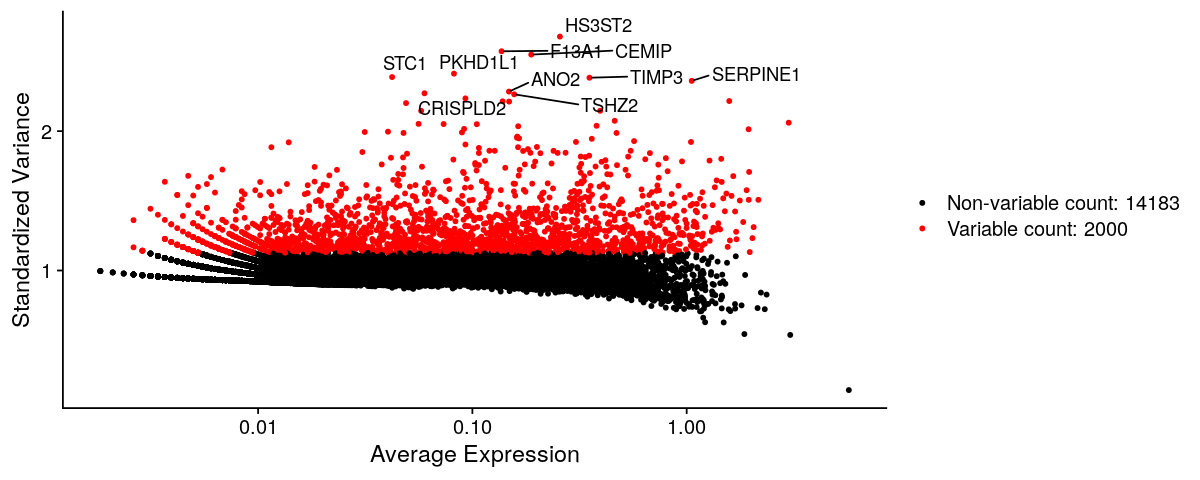

In [98]:
# plot variable features
options(repr.plot.width=10, repr.plot.height=4)
plot1 <- VariableFeaturePlot(seurat_object)
LabelPoints(plot=plot1, points=VariableFeatures(seurat_object)[1:10], repel = TRUE)

By default, the 2000 most variable genes are selected for downstream analysis (shown in red).

### Scaling the data

We apply a linear transformation so that highly-expressed genes do not dominate in downstream analyses.

In [99]:
allGenes <- rownames(seurat_object)
seurat_object <- ScaleData(seurat_object, features = allGenes)

Centering and scaling data matrix



In [100]:
# seurat_object[["RNA"]]@scale.data[1:5,1:5]
GetAssayData(seurat_object, slot="scale.data")[1:5,1:5]

AAACCCACAGACAAGC-1-0 AAACCCACAGAGGTAC-1-0 AAACCCATCTTACTGT-1-0
RP11-34P13.7  -0.07556523          -0.07556523          -0.07556523         
FO538757.2    -0.42484304          -0.42484304          -0.42484304         
AP006222.2    -0.15331092          -0.15331092          -0.15331092         
RP4-669L17.10 -0.16882279          -0.16882279          -0.16882279         
RP5-857K21.4  -0.42085587          -0.42085587          -0.42085587         
              AAACGAATCAACGTGT-1-0 AAACGCTCAAGAAACT-1-0
RP11-34P13.7  -0.07556523          -0.07556523         
FO538757.2    -0.42484304          -0.42484304         
AP006222.2    -0.15331092          -0.15331092         
RP4-669L17.10 -0.16882279          -0.16882279         
RP5-857K21.4   2.51407439          -0.42085587

### PCA

We perform a principal component analysis (PCA) on the scaled data to convert high-dimensional expression data to a lower-dimensionality space, so the variance of the data in the low-dimensional representation is maximized.

We calculate the first three PCs, and print the first 5 genes for each PC, and we can still get the genes attributed to each PC from the seurat object.

In [104]:
seurat_object <- RunPCA(seurat_object, ndims.print = 1:3, nfeatures.print = 5)

PC_ 1 
Positive:  CALD1, PRKG1, CACNA1C, LTBP1, KALRN 
Negative:  RBM47, PIK3R5, MSR1, DOCK8, PTPRC 
PC_ 2 
Positive:  SHANK3, PTPRB, VWF, LDB2, ANO2 
Negative:  KCNMA1, ITGA8, MYH11, DTNA, CARMN 
PC_ 3 
Positive:  PDE4D, SYNE2, ST6GALNAC3, PREX2, SPARCL1 
Negative:  CEMIP, COL6A3, COL11A1, DCN, ROR2 



In [102]:
print(seurat_object[["pca"]], dims = 1:5, nfeatures = 20)

PC_ 1 
Positive:  CALD1, PRKG1, CACNA1C, LTBP1, KALRN, ITGA8, RBMS3, ZBTB16, CDH13, DMD 
	   SUGCT, RBPMS, COL8A1, PCDH7, RCAN2, HMCN1, PTPRG, PDE3A, SORBS1, ATP10A 
Negative:  RBM47, PIK3R5, MSR1, DOCK8, PTPRC, SLC1A3, DOCK2, CTSB, SLCO2B1, SYK 
	   MYO1F, FMN1, FYB, APBB1IP, ITGAX, TBXAS1, DAPK1, IQGAP2, CD74, ABCA1 
PC_ 2 
Positive:  SHANK3, PTPRB, VWF, LDB2, ANO2, SNTG2, ADGRL4, TSHZ2, THSD7A, CXorf36 
	   ZNF521, FLT1, PLCB1, EGFL7, STC1, TLL1, PLEKHG1, MYO5C, NEURL1B, MYRIP 
Negative:  KCNMA1, ITGA8, MYH11, DTNA, CARMN, AKAP6, PRUNE2, LMOD1, C8orf34, GRIA2 
	   RCAN2, NEXN, MYOCD, GRIA1, DMD, ERBB4, LDB3, PDE8B, SDK1, SLC24A3 
PC_ 3 
Positive:  PDE4D, SYNE2, ST6GALNAC3, PREX2, SPARCL1, RYR2, SHANK3, ADAMTS9, ANO2, CXorf36 
	   CNTN4, VWF, PLCB4, LDB3, GALNT18, STC1, UNC13C, PHACTR1, THSD7A, GRIA2 
Negative:  CEMIP, COL6A3, COL11A1, DCN, ROR2, ABI3BP, FAP, FGF7, FNDC1, PSD3 
	   CACNB4, TEX41, BICC1, LUM, RP11-761N21.1, SLIT2, CFH, CRTAC1, FGF14, SERPINE2 
PC_ 4 
Positive:  DOCK4,

We use three visualization commands (VizDimLoadings, DimPlot, and DimHeatmap) to observe the cells and genes associated with each principal component.

1. VizDimLoadings: indicate top genes for a PC ranked by the scores absolute values

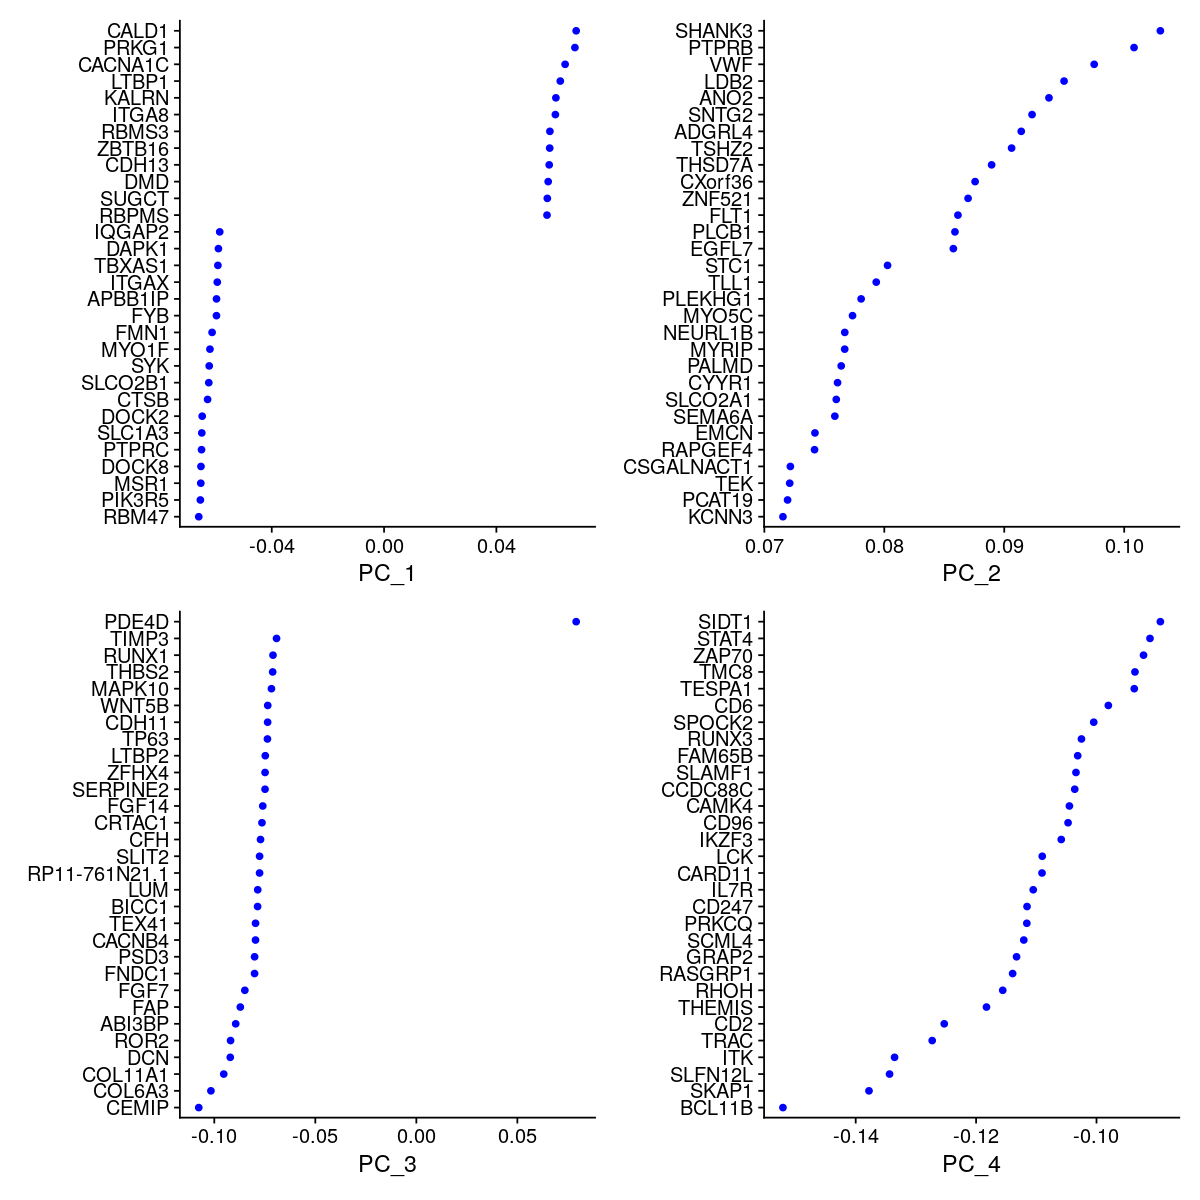

In [105]:
options(repr.plot.width=10, repr.plot.height=10)
VizDimLoadings(seurat_object, dims = 1:4, reduction = "pca")

2. DimPlot: plot the cells on the first two PC axes:

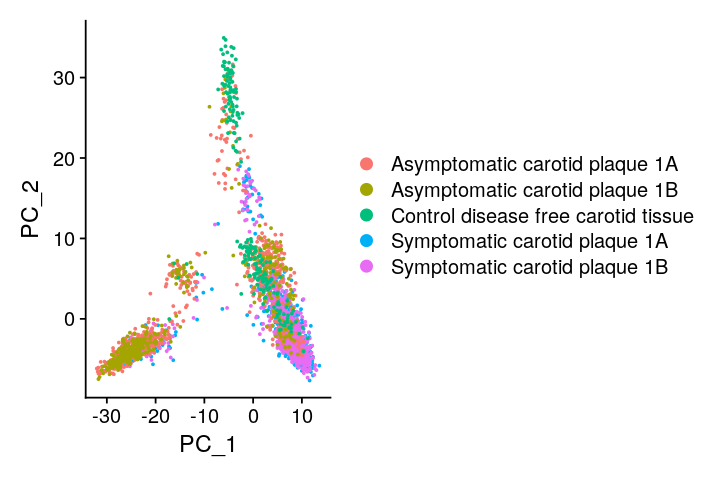

In [109]:
options(repr.plot.width=6, repr.plot.height=4)
DimPlot(seurat_object, reduction = "pca", group.by = 'biosample_id')

3. DimHeatmap: visualize the PCA scores of genes and cells for one or more principal components.

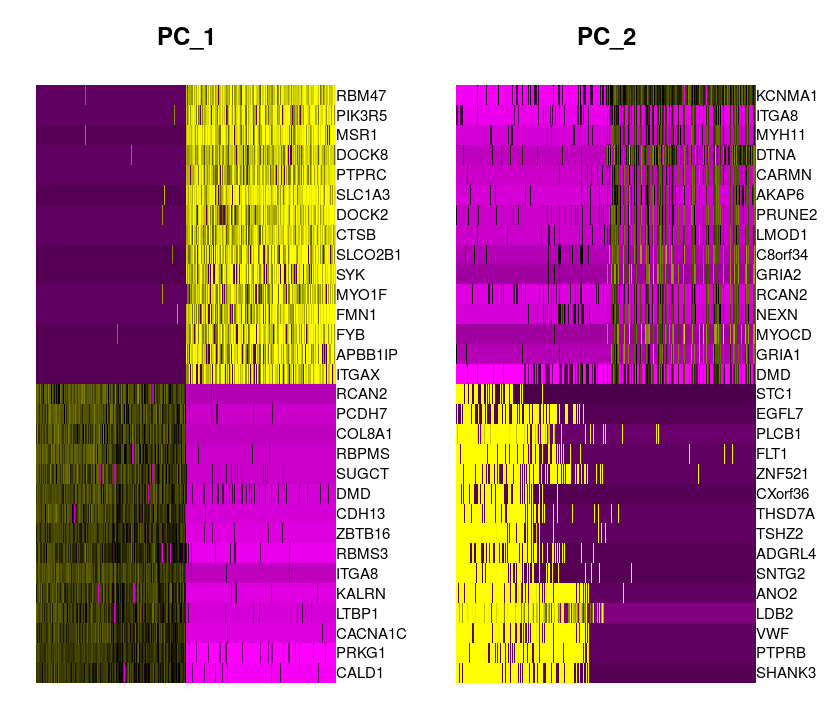

In [107]:
options(repr.plot.width=7, repr.plot.height=6)
DimHeatmap(seurat_object, dims = 1:2, cells = 500, balanced = TRUE)

### Clustering the cells

We need to use PCs for the clustering step.

First, we use elbow-method to find the cutoff where there is a clear elbow in the graph.

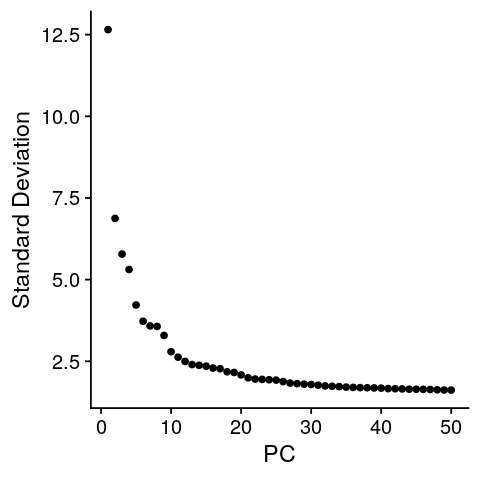

In [110]:
options(repr.plot.width=4, repr.plot.height=4)
ElbowPlot(seurat_object, ndims=50)

In this case, the elbow would fail around 9, so the first 9 PCs capture the majority of signal.

9 PCs will be used for selecting the clusters of cells and the 2D visualization.

In [112]:
seurat_object <- FindNeighbors(seurat_object, dims = 1:9)
seurat_object <- FindClusters(seurat_object, resolution = c(0.2, 1.0, 2.0))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3815
Number of edges: 119349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9381
Number of communities: 9
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3815
Number of edges: 119349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8358
Number of communities: 15
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3815
Number of edges: 119349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7701
Number of communities: 21
Elapsed time: 0 seconds


In [113]:
head(seurat_object[[]])

orig.ident    nCount_RNA nFeature_RNA
AAACCCACAGACAAGC-1-0 SeuratProject 2263       1658        
AAACCCACAGAGGTAC-1-0 SeuratProject 1999       1626        
AAACCCATCTTACTGT-1-0 SeuratProject 2170       1840        
AAACGAATCAACGTGT-1-0 SeuratProject 1704       1240        
AAACGCTCAAGAAACT-1-0 SeuratProject 1525       1206        
AAACGCTGTGGTAATA-1-0 SeuratProject 1431       1102        
                     biosample_id                  donor_id
AAACCCACAGACAAGC-1-0 Symptomatic carotid plaque 1A 751     
AAACCCACAGAGGTAC-1-0 Symptomatic carotid plaque 1A 751     
AAACCCATCTTACTGT-1-0 Symptomatic carotid plaque 1A 751     
AAACGAATCAACGTGT-1-0 Symptomatic carotid plaque 1A 751     
AAACGCTCAAGAAACT-1-0 Symptomatic carotid plaque 1A 751     
AAACGCTGTGGTAATA-1-0 Symptomatic carotid plaque 1A 751     
                     celltype               AllData percent.mt RNA_snn_res.0.2
AAACCCACAGACAAGC-1-0 Vascular Smooth Muscle AllData 0          1              
AAACCCACAGAGGTAC-1-0 Vascular Smooth Muscle AllData 0          0              
AAACCCATCTTACTGT-1-0 Fibroblast             AllData 0          1              
AAACGAATCAACGTGT-1-0 Vascular Smooth Muscle AllData 0          0              
AAACGCTCAAGAAACT-1-0 Vascular Smooth Muscle AllData 0          1              
AAACGCTGTGGTAATA-1-0 Vascular Smooth Muscle AllData 0          0              
                     RNA_snn_res.1 RNA_snn_res.2 seurat_clusters
AAACCCACAGACAAGC-1-0 7             3             3              
AAACCCACAGAGGTAC-1-0 2             1             1              
AAACCCATCTTACTGT-1-0 9             15            15             
AAACGAATCAACGTGT-1-0 0             0             0              
AAACGCTCAAGAAACT-1-0 7             3             3              
AAACGCTGTGGTAATA-1-0 0             0             0

In [114]:
# How many clusters are there in each resolution?
for (x in c('RNA_snn_res.0.2', 'RNA_snn_res.1', 'RNA_snn_res.2'))
{
    message(x, ': ', length(unique(unlist(seurat_object[[x]]))), ' custers')
}    

RNA_snn_res.0.2: 9 custers

RNA_snn_res.1: 15 custers

RNA_snn_res.2: 21 custers



In [115]:
# How many cells are assigned by cluster?
table(Idents(seurat_object))


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
450 368 333 287 242 206 201 193 192 184 177 144 140 139 120 102  93  81  65  58 
 20 
 40 

### 2D projections

We project data into 2D spaces with non-linear dimensionality reduction methods to visualize single-cell data. Both TSNE and UMAP methods are used to map multi-dimensional data to a lower dimensional space based on similarity keeping similar cells near each other.

In [117]:
# tSNE
seurat_object <- RunTSNE(seurat_object, dims = 1:9)
# UMAP
seurat_object <- RunUMAP(seurat_object, dims = 1:9)

00:08:02 UMAP embedding parameters a = 0.9922 b = 1.112

00:08:02 Read 3815 rows and found 9 numeric columns

00:08:02 Using Annoy for neighbor search, n_neighbors = 30

00:08:02 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

00:08:03 Writing NN index file to temp file /tmp/Rtmp4inQSH/file3f032863533e8d

00:08:03 Searching Annoy index using 1 thread, search_k = 3000

00:08:04 Annoy recall = 100%

00:08:04 Commencing smooth kNN distance calibration using 1 thread

00:08:05 Found 2 connected components, falling back to 'spca' initialization with init_sdev = 1

00:08:05 Initializing from PCA

00:08:05 PCA: 2 components explained 61.51% variance

00:08:05 Commencing optimization for 500 epochs, with 154080 positive edges

00:08:09 Optimization finished



Plot the result from both methods by 'biosample_id' to see whether there is any clear batch effect.

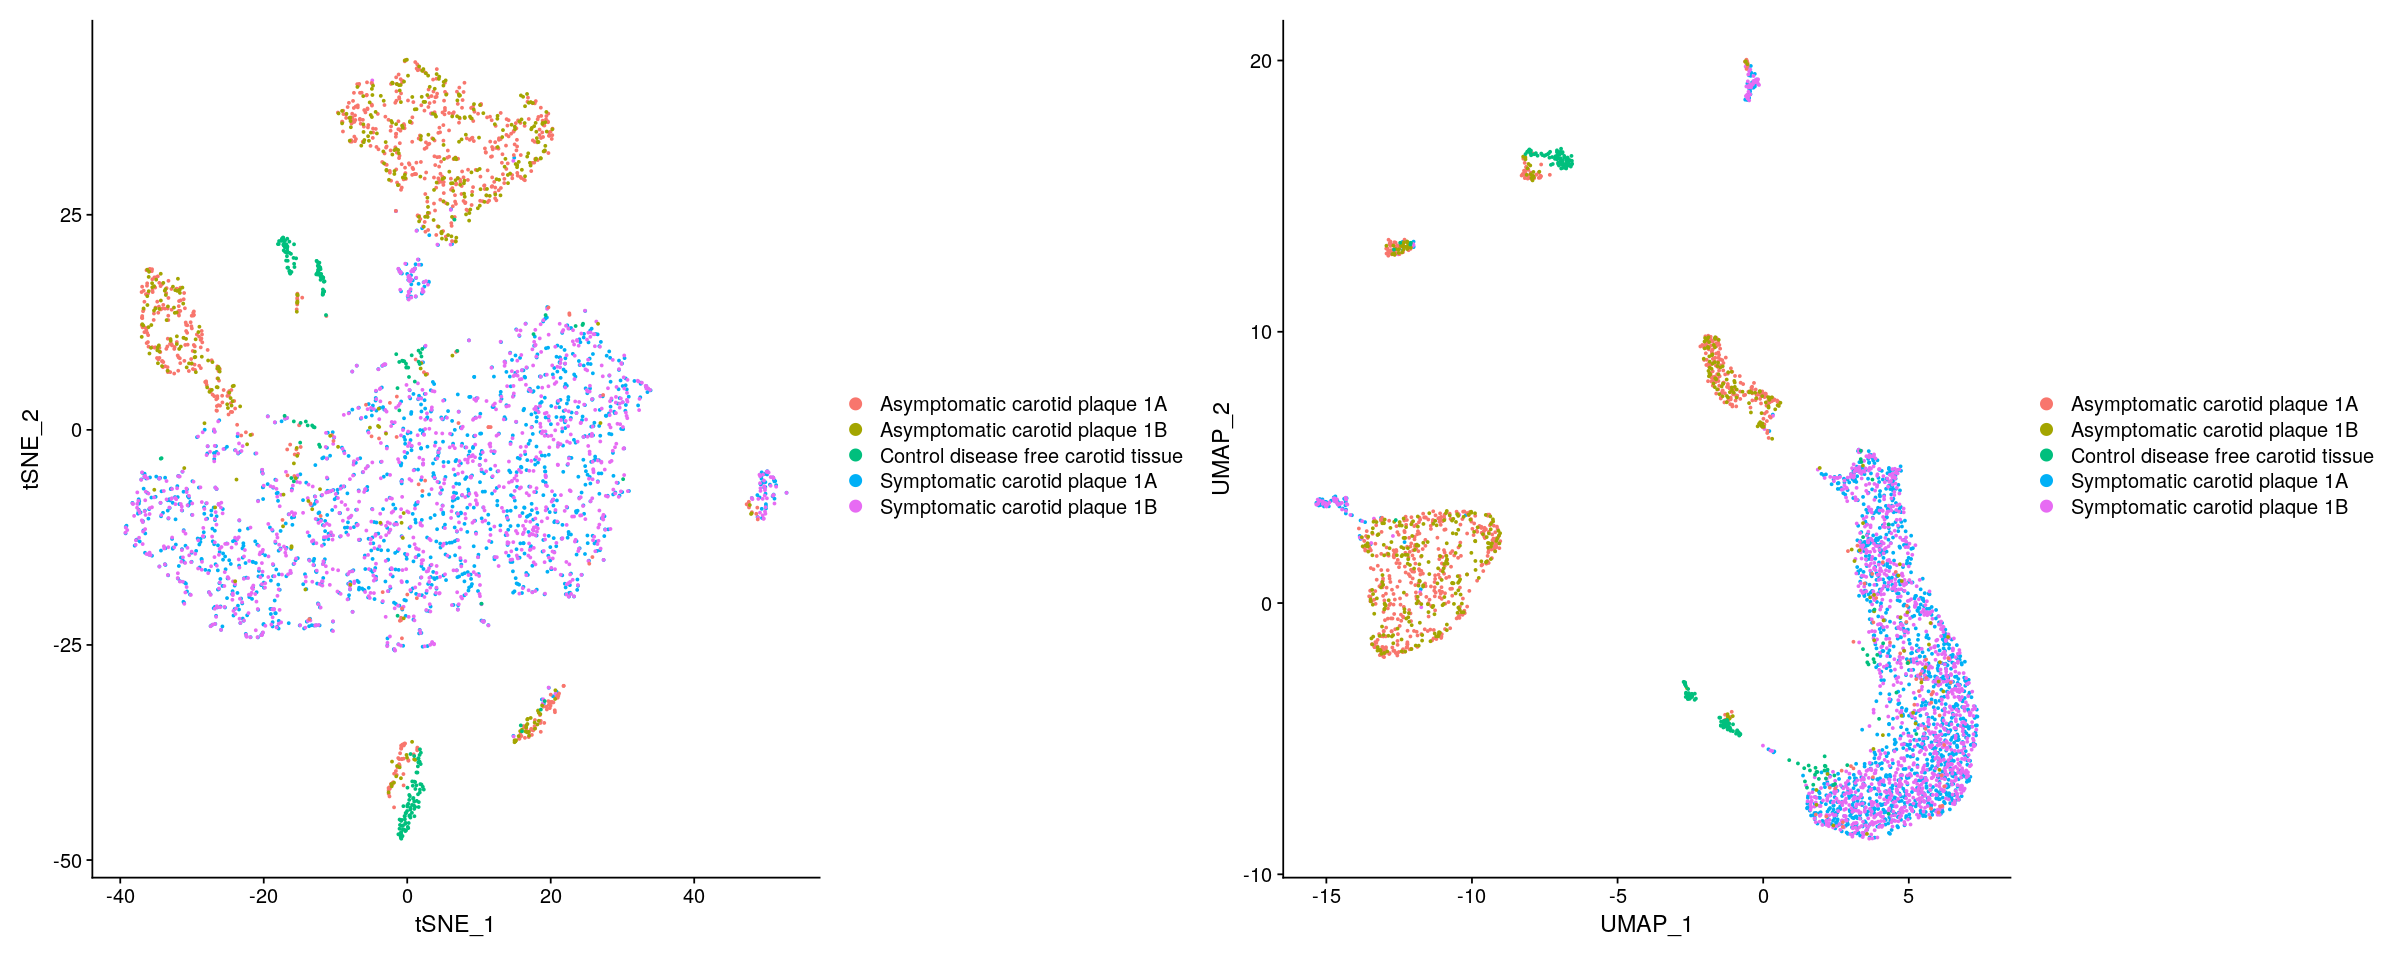

In [118]:
options(repr.plot.width=20, repr.plot.height=8)
plot1 <- DimPlot(seurat_object, reduction = "tsne", group.by = 'biosample_id')
plot2 <- DimPlot(seurat_object, reduction = "umap", group.by = 'biosample_id')
plot1 + plot2

It seems like method UMAP has a better effect.

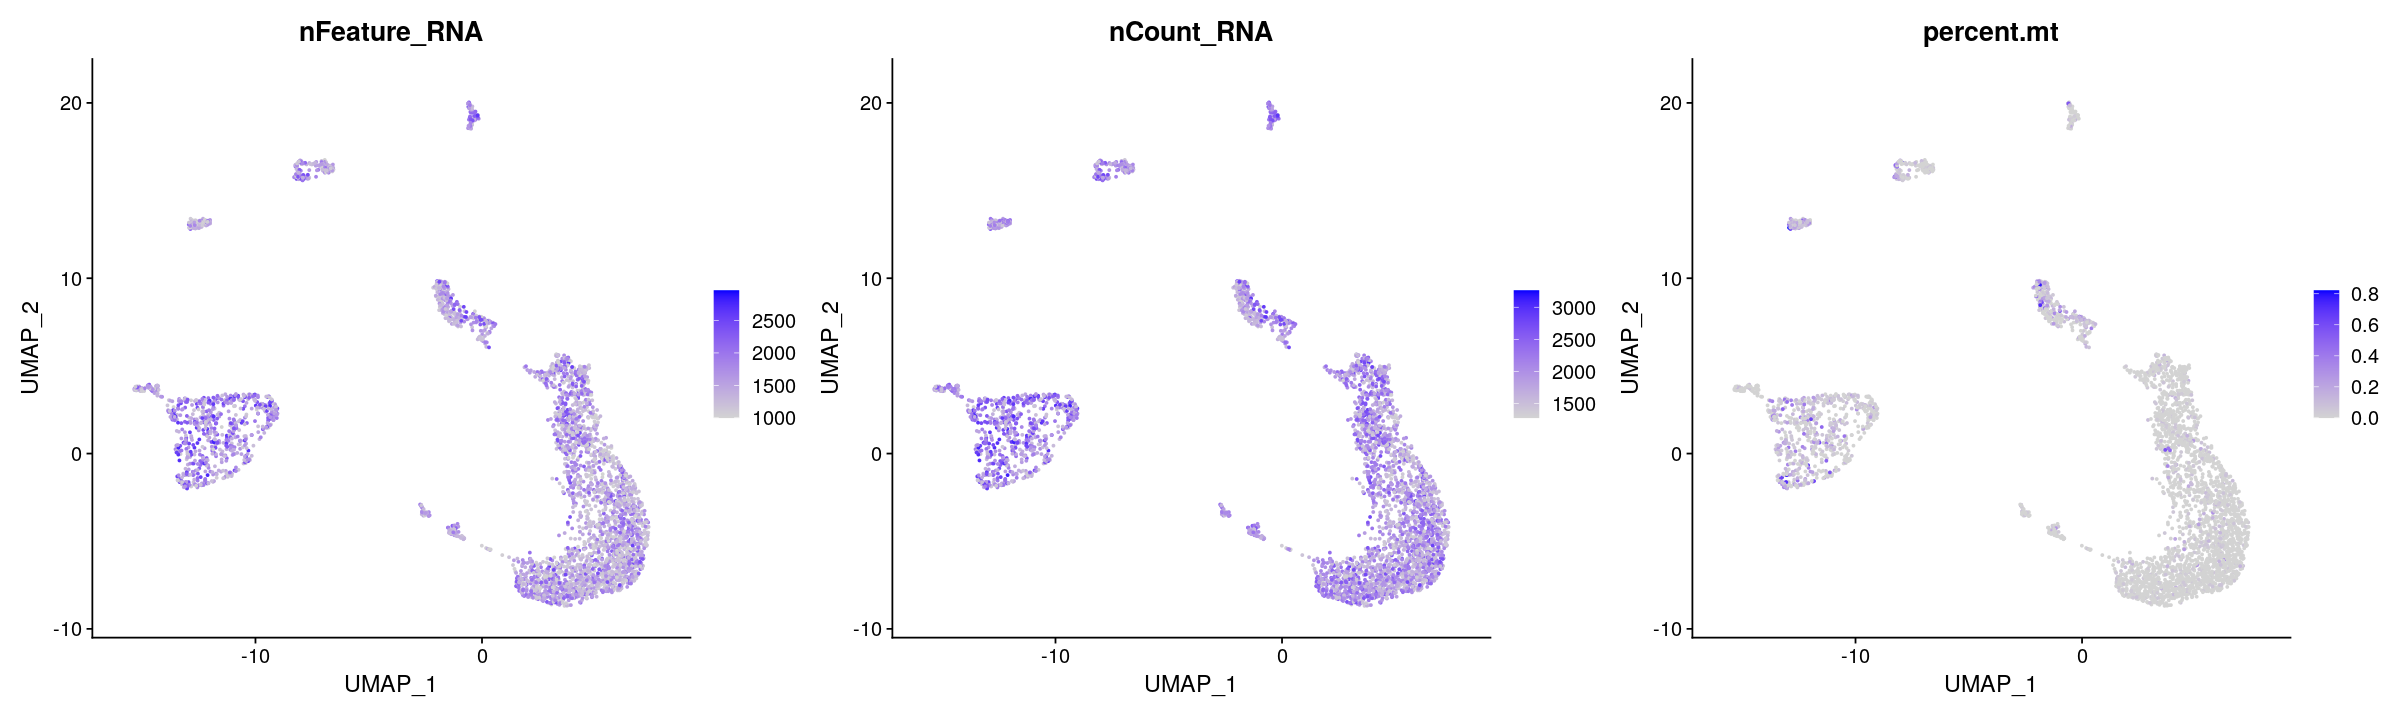

In [119]:
options(repr.plot.width=20, repr.plot.height=6)
FeaturePlot(seurat_object, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol=3)

The data has been cleaned, so there is no relatively high counts between clusters, which indicates the cleanning step works successfully.

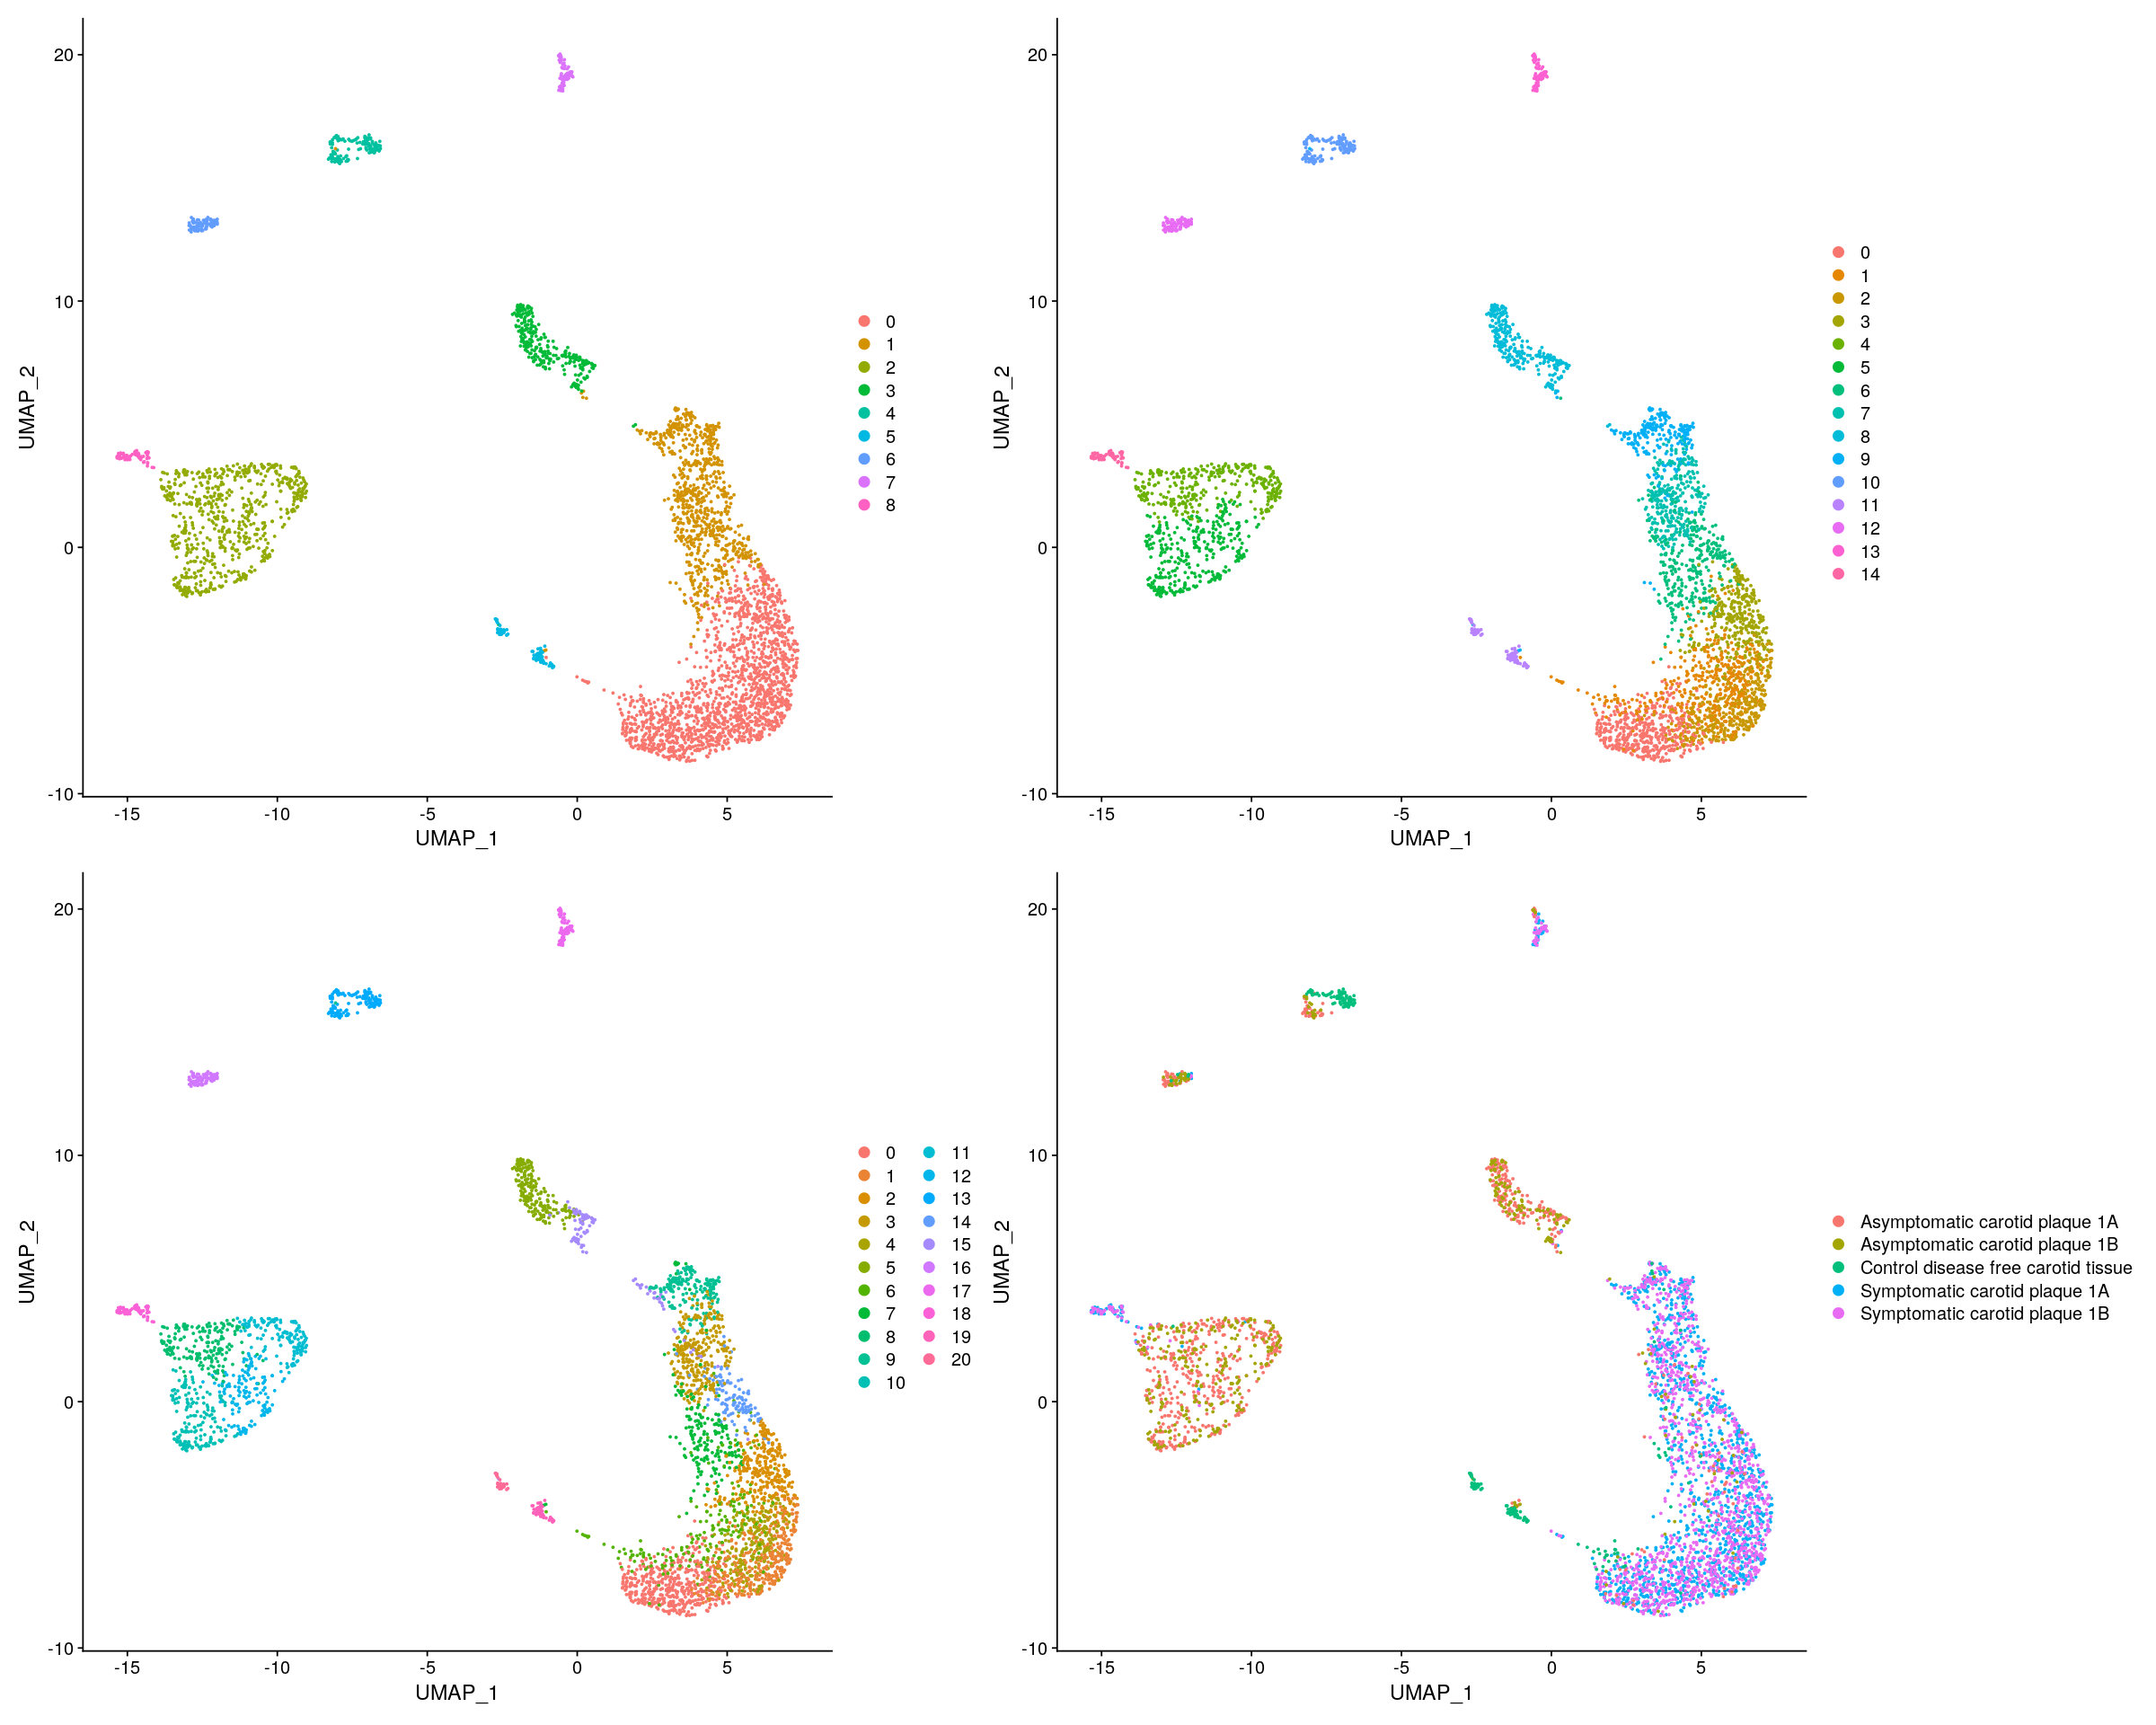

In [120]:
options(repr.plot.width=20, repr.plot.height=16)
plot1 <- DimPlot(seurat_object, reduction = "umap", group.by = 'RNA_snn_res.0.2')
plot2 <- DimPlot(seurat_object, reduction = "umap", group.by = 'RNA_snn_res.1')
plot3 <- DimPlot(seurat_object, reduction = "umap", group.by = 'RNA_snn_res.2')
plot4 <- DimPlot(seurat_object, reduction = "umap", group.by = 'biosample_id')
plot1 + plot2 + plot3 + plot4

In this case resolution '0.2' seems to match best with the 2D projection, so we will start by exploring it.

In [121]:
Idents(seurat_object) <- 'RNA_snn_res.0.2'
table(Idents(seurat_object))


   0    1    2    3    4    5    6    7    8 
1642  771  653  273  139   98   93   81   65 

In [122]:
table(Idents(seurat_object), seurat_object$biosample_id)

   
    Asymptomatic carotid plaque 1A Asymptomatic carotid plaque 1B
  0                             38                             20
  1                             14                             19
  2                            407                            227
  3                            179                             90
  4                             40                             14
  5                              6                              5
  6                             46                             29
  7                             10                              3
  8                              0                              0
   
    Control disease free carotid tissue Symptomatic carotid plaque 1A
  0                                  30                           781
  1                                  14                           369
  2                                   1                             9
  3                                   0             

In these clusters, we can see clusters 0,1,7,8 are formed by cells mainly of Symptomatic carotid plaque samples, clusters 2,3 are formed by cells mainly of Asymptomatic carotid plaque samples, and clusters 4,5 are formed by cells mainly of Control disease free carotid tissue, which is a good result for clustering step.

In [123]:
cntBySample = table(Idents(seurat_object), seurat_object$biosample_id)
cntBySample = t(round(cntBySample/rowSums(cntBySample), 2))
cbind(sort(apply(cntBySample, 2, max)))

[,1]
7 0.44
0 0.48
1 0.48
6 0.49
8 0.51
4 0.61
2 0.62
3 0.66
5 0.89

### Differentially expressed genes / Markers

Now we need to characterize those clusters.

First to find genes that are specific to the clusters via differential expression (Markers).

In [124]:
# Make sure you will use the chosen resolution:
Idents(seurat_object) <- 'RNA_snn_res.0.2'
table(Idents(seurat_object))


   0    1    2    3    4    5    6    7    8 
1642  771  653  273  139   98   93   81   65 

In [125]:
DEGs <- FindAllMarkers(seurat_object, only.pos=TRUE, min.pct=0.25)

# Save the markers for later
saveRDS(DEGs, file = "DEG.rds")

# To save as text:
write.table(DEGs, file = "DEGs.txt", sep = "\t", quote = F, col.names = F)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



Top markers for each cluster:

In [126]:
DEGs_top5 <- DEGs %>% group_by(cluster) %>% top_n(5, avg_logFC)
DEGs_top5[1:20,]

p_val         avg_logFC pct.1 pct.2 p_val_adj     cluster gene   
1   0.000000e+00 1.498707  0.810 0.180  0.000000e+00 0       SDK1   
2   0.000000e+00 1.493823  0.717 0.097  0.000000e+00 0       GRIA2  
3  1.272544e-294 1.477953  0.692 0.132 2.059358e-290 0       RYR2   
4  5.172745e-271 1.467168  0.645 0.111 8.371053e-267 0       CNTN4  
5  3.023091e-264 1.545170  0.532 0.043 4.892269e-260 0       UNC13C 
6  3.695882e-249 1.248132  0.869 0.302 5.981046e-245 1       ANK3   
7  1.307786e-184 1.172385  0.707 0.199 2.116390e-180 1       CFH    
8  1.350631e-136 1.117386  0.409 0.069 2.185727e-132 1       LAMA3  
9  3.910474e-126 1.040877  0.441 0.093 6.328320e-122 1       MEG3   
10  9.988316e-94 1.030684  0.252 0.034  1.616409e-89 1       SGCG   
11  0.000000e+00 2.071705  0.864 0.041  0.000000e+00 2       SLC1A3 
12  0.000000e+00 2.069885  0.879 0.035  0.000000e+00 2       MSR1   
13  0.000000e+00 2.052083  0.939 0.065  0.000000e+00 2       RBM47  
14  0.000000e+00 1.946782  0.787 0.013  0.000000e+00 2       ITGAX  
15  0.000000e+00 1.940021  0.911 0.076  0.000000e+00 2       CTSB   
16  0.000000e+00 2.330081  0.736 0.038  0.000000e+00 3       CEMIP  
17  0.000000e+00 1.894217  0.553 0.015  0.000000e+00 3       COL11A1
18  0.000000e+00 1.762926  0.612 0.024  0.000000e+00 3       ROR2   
19 2.700794e-275 1.750792  0.527 0.019 4.370694e-271 3       FGF7   
20 9.020541e-226 2.051399  0.828 0.127 1.459794e-221 3       TIMP3

The expression of specific genes can be visualized using DoHeatmap, VlnPlot and FeaturePlot:

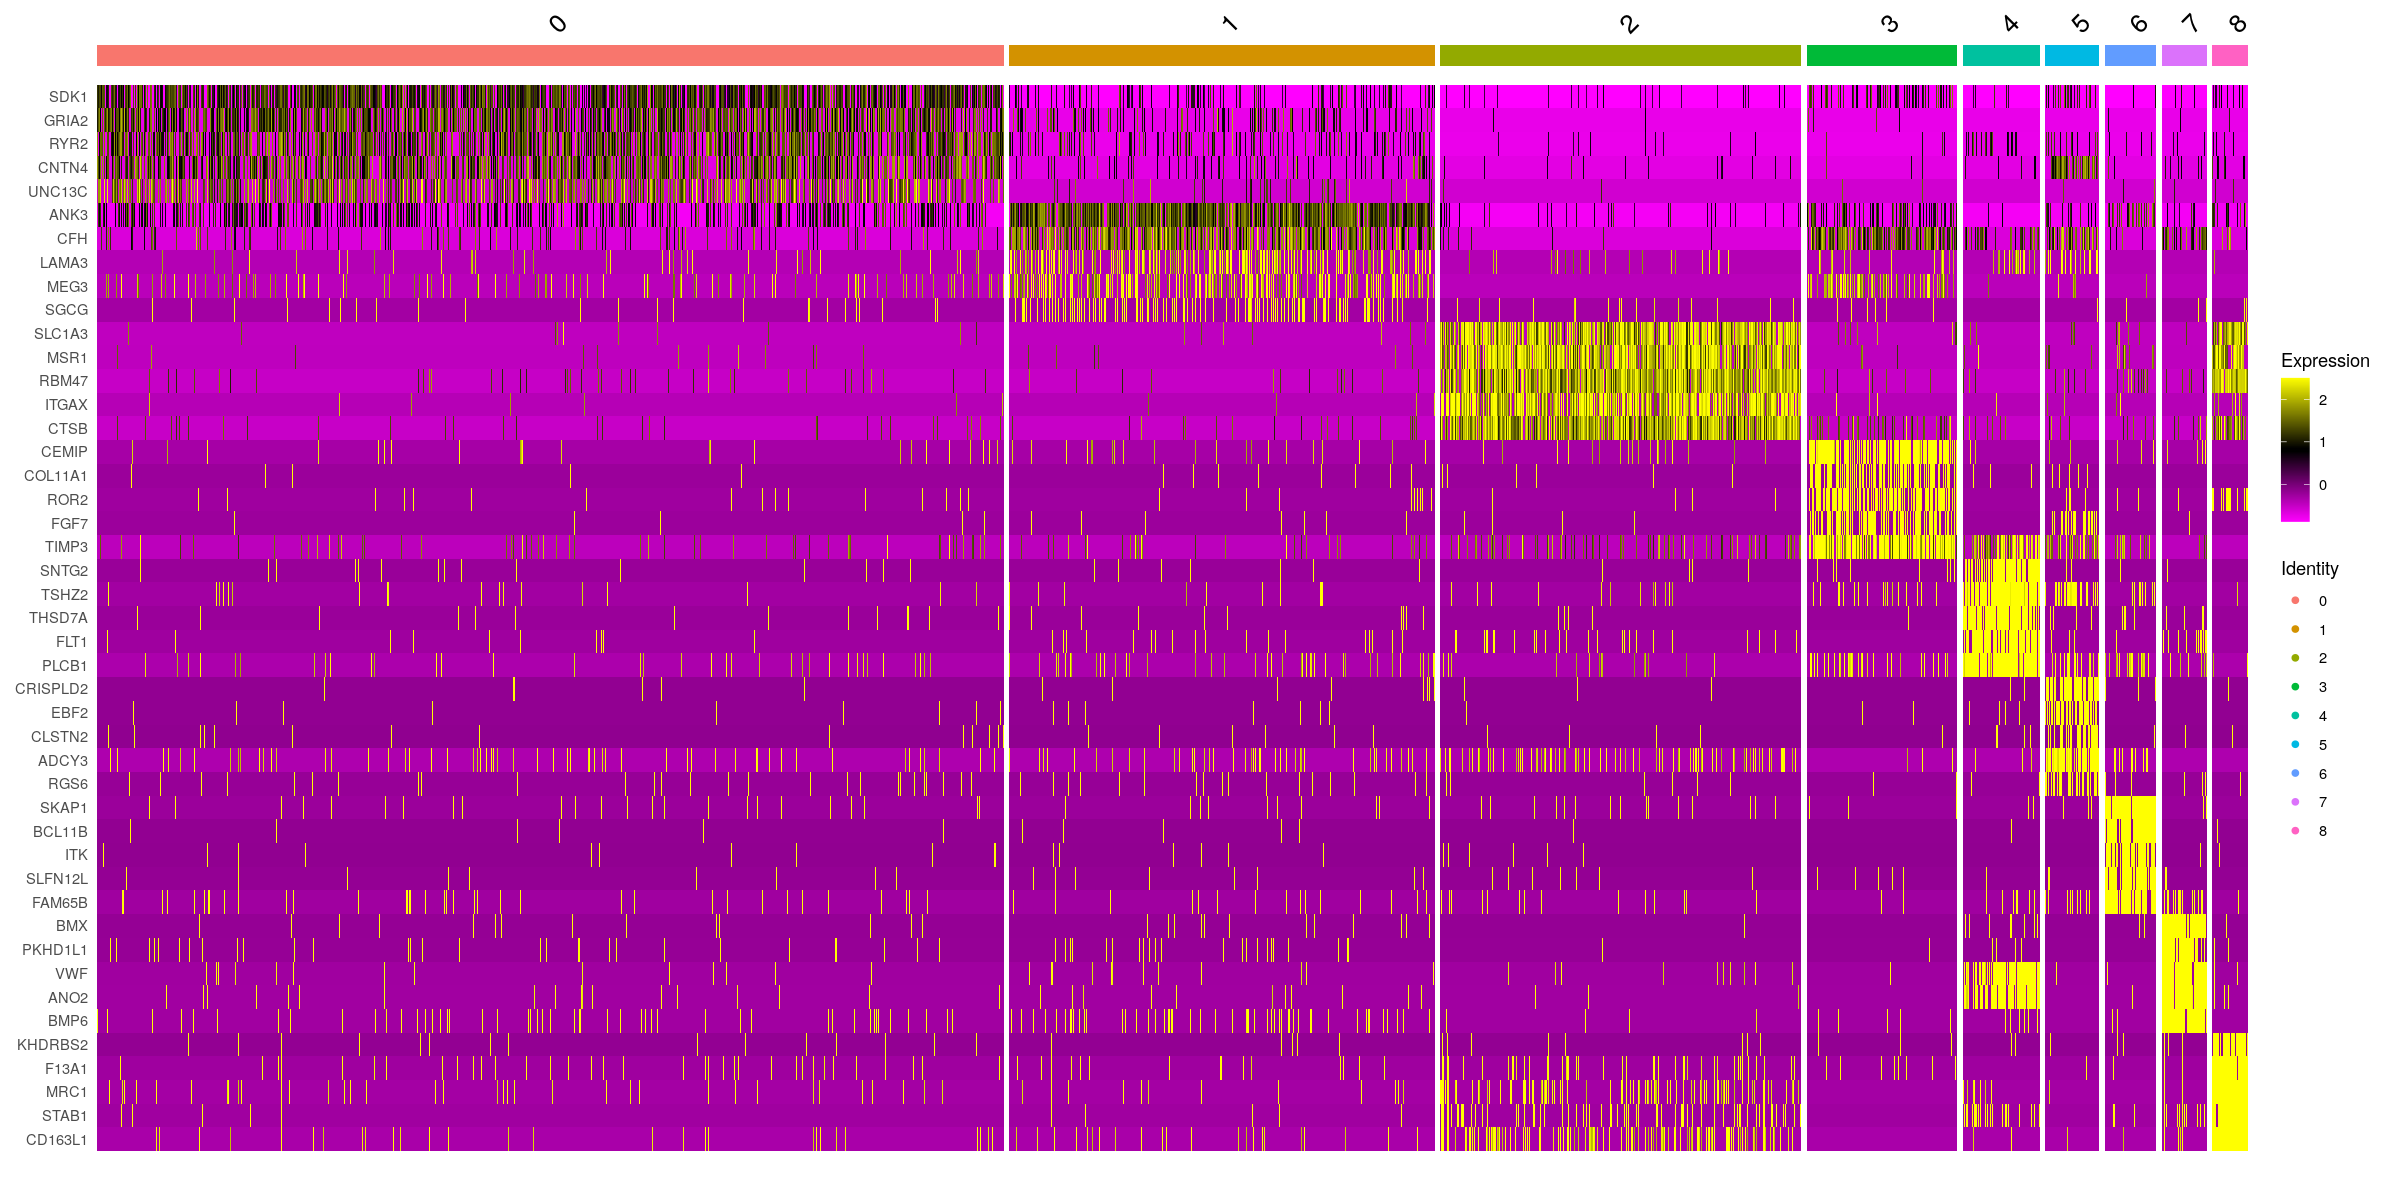

In [127]:
options(repr.plot.width=20, repr.plot.height=10)
DoHeatmap(seurat_object, features = DEGs_top5$gene)

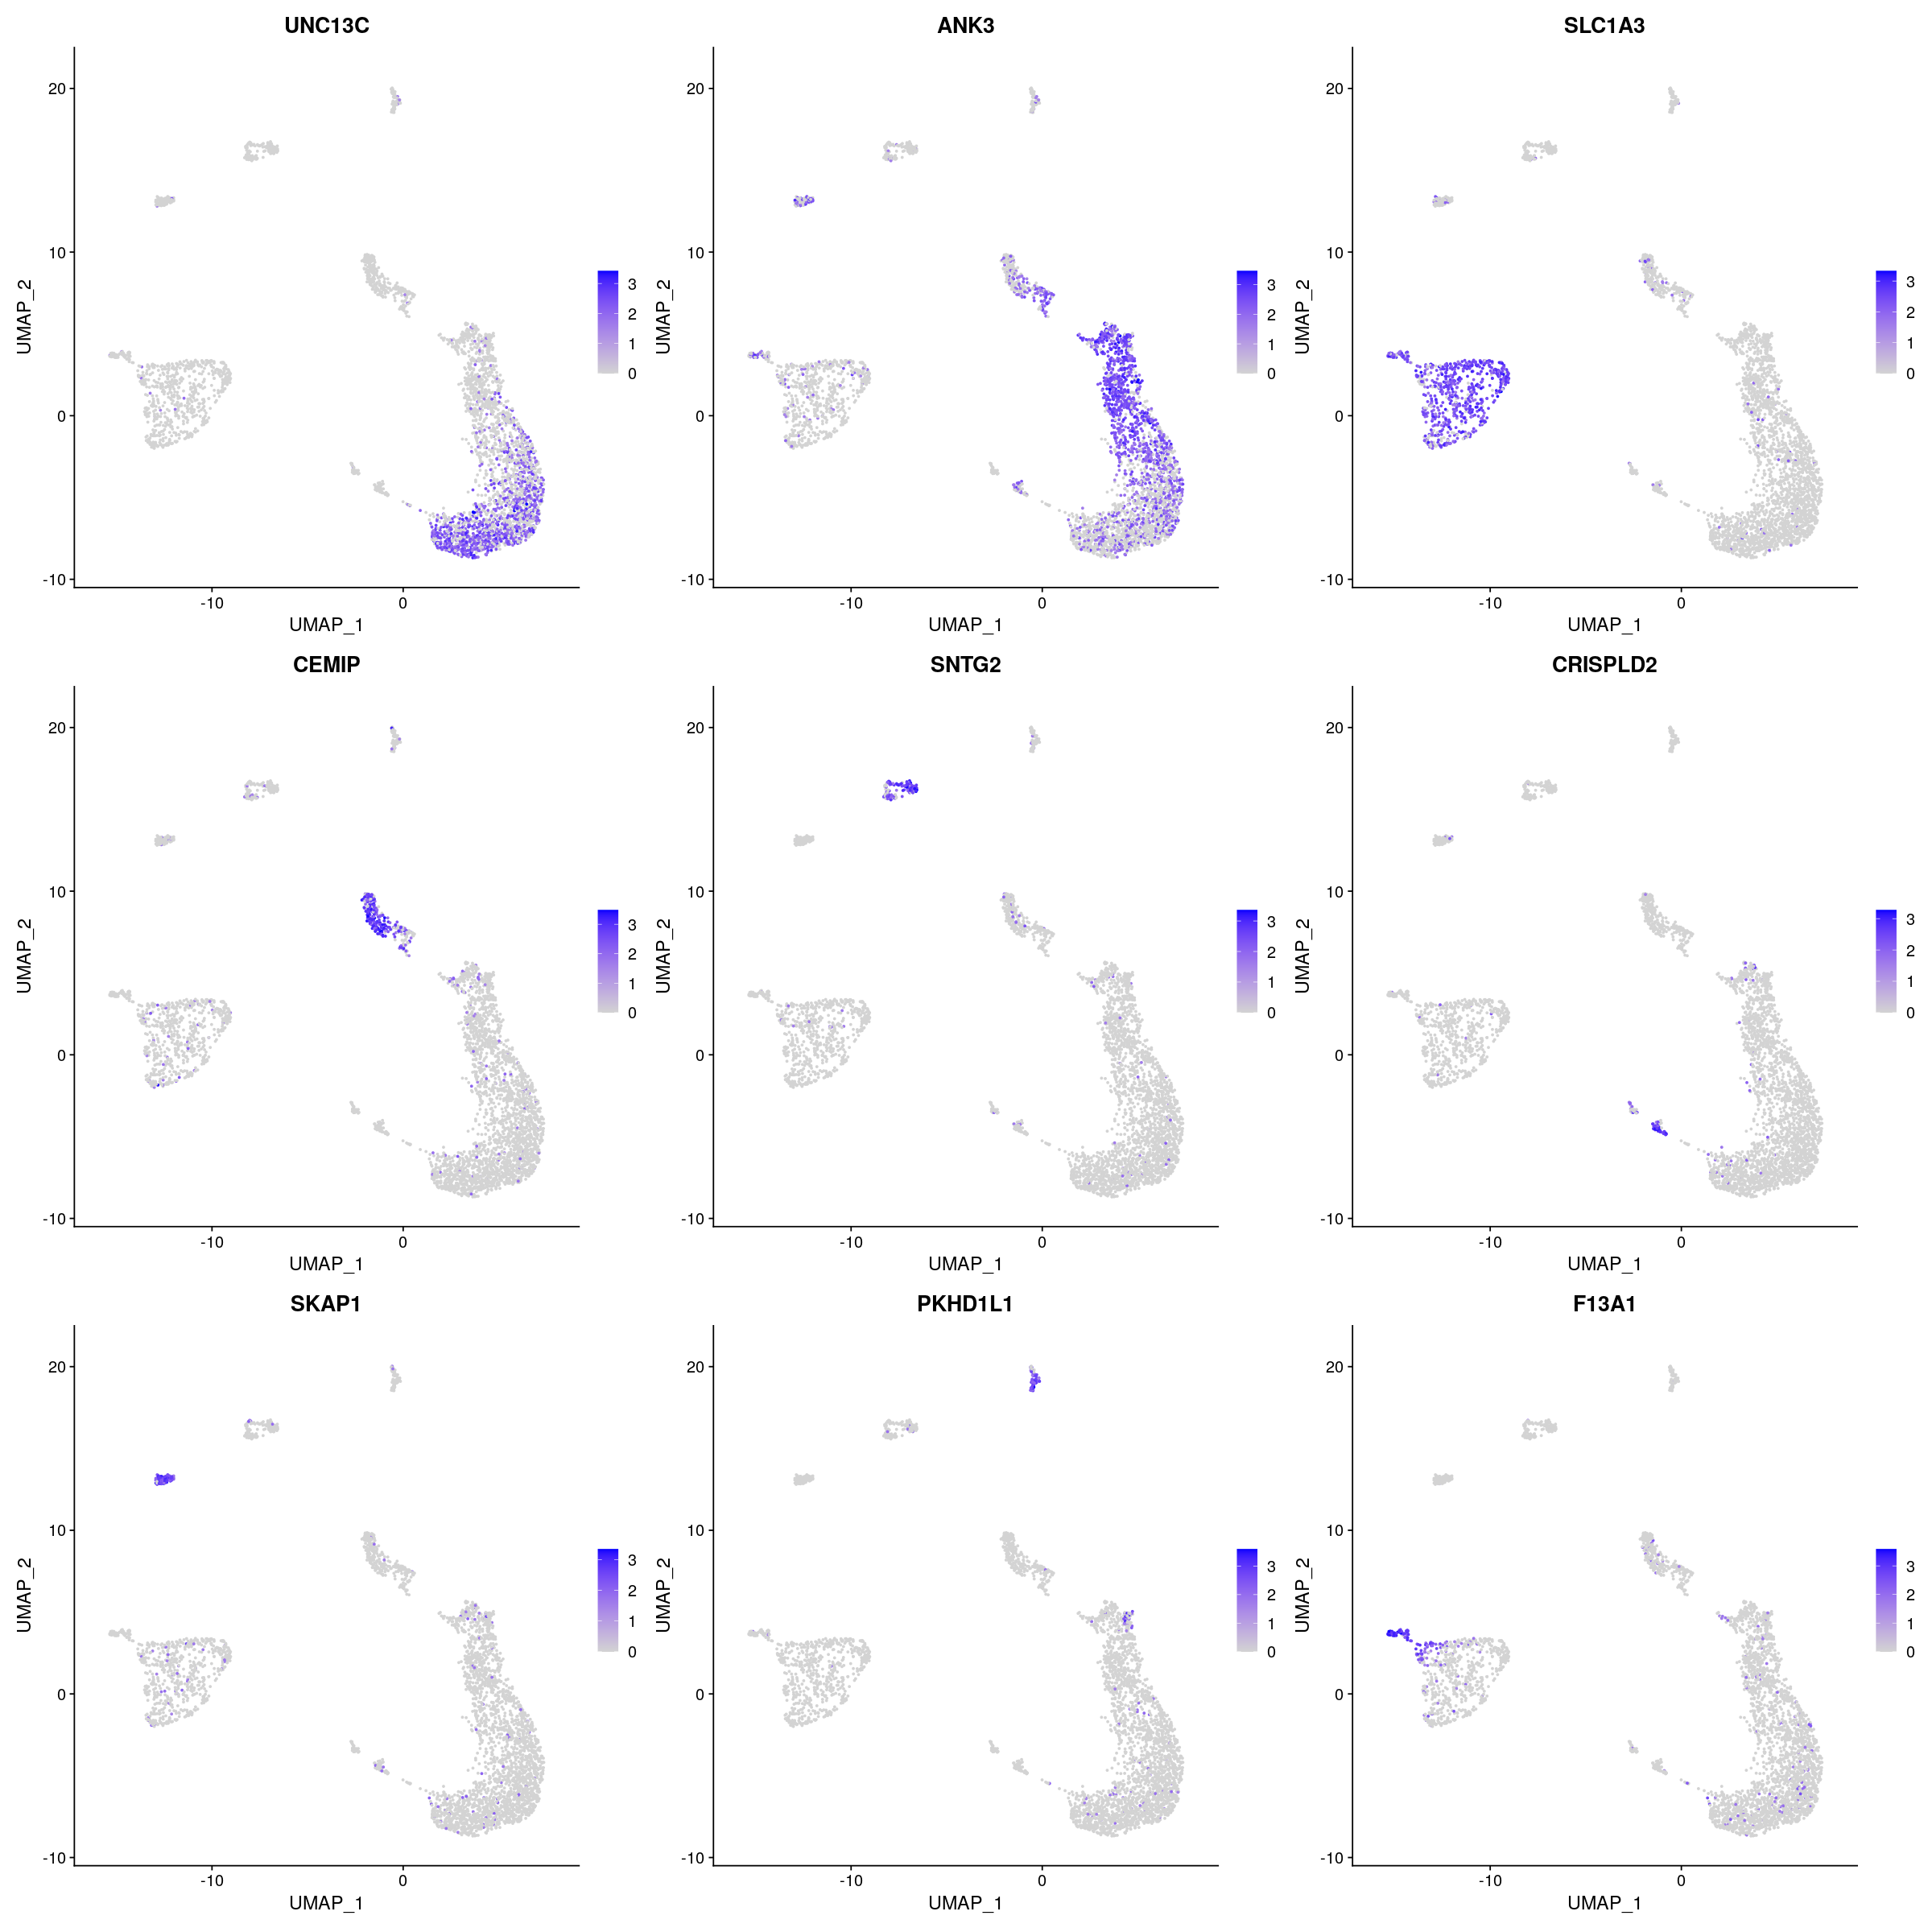

In [128]:
options(repr.plot.width=20, repr.plot.height=20)
top1 <- DEGs %>% group_by(cluster) %>% top_n(n = 1, wt = avg_logFC)
FeaturePlot(seurat_object, features = top1$gene)

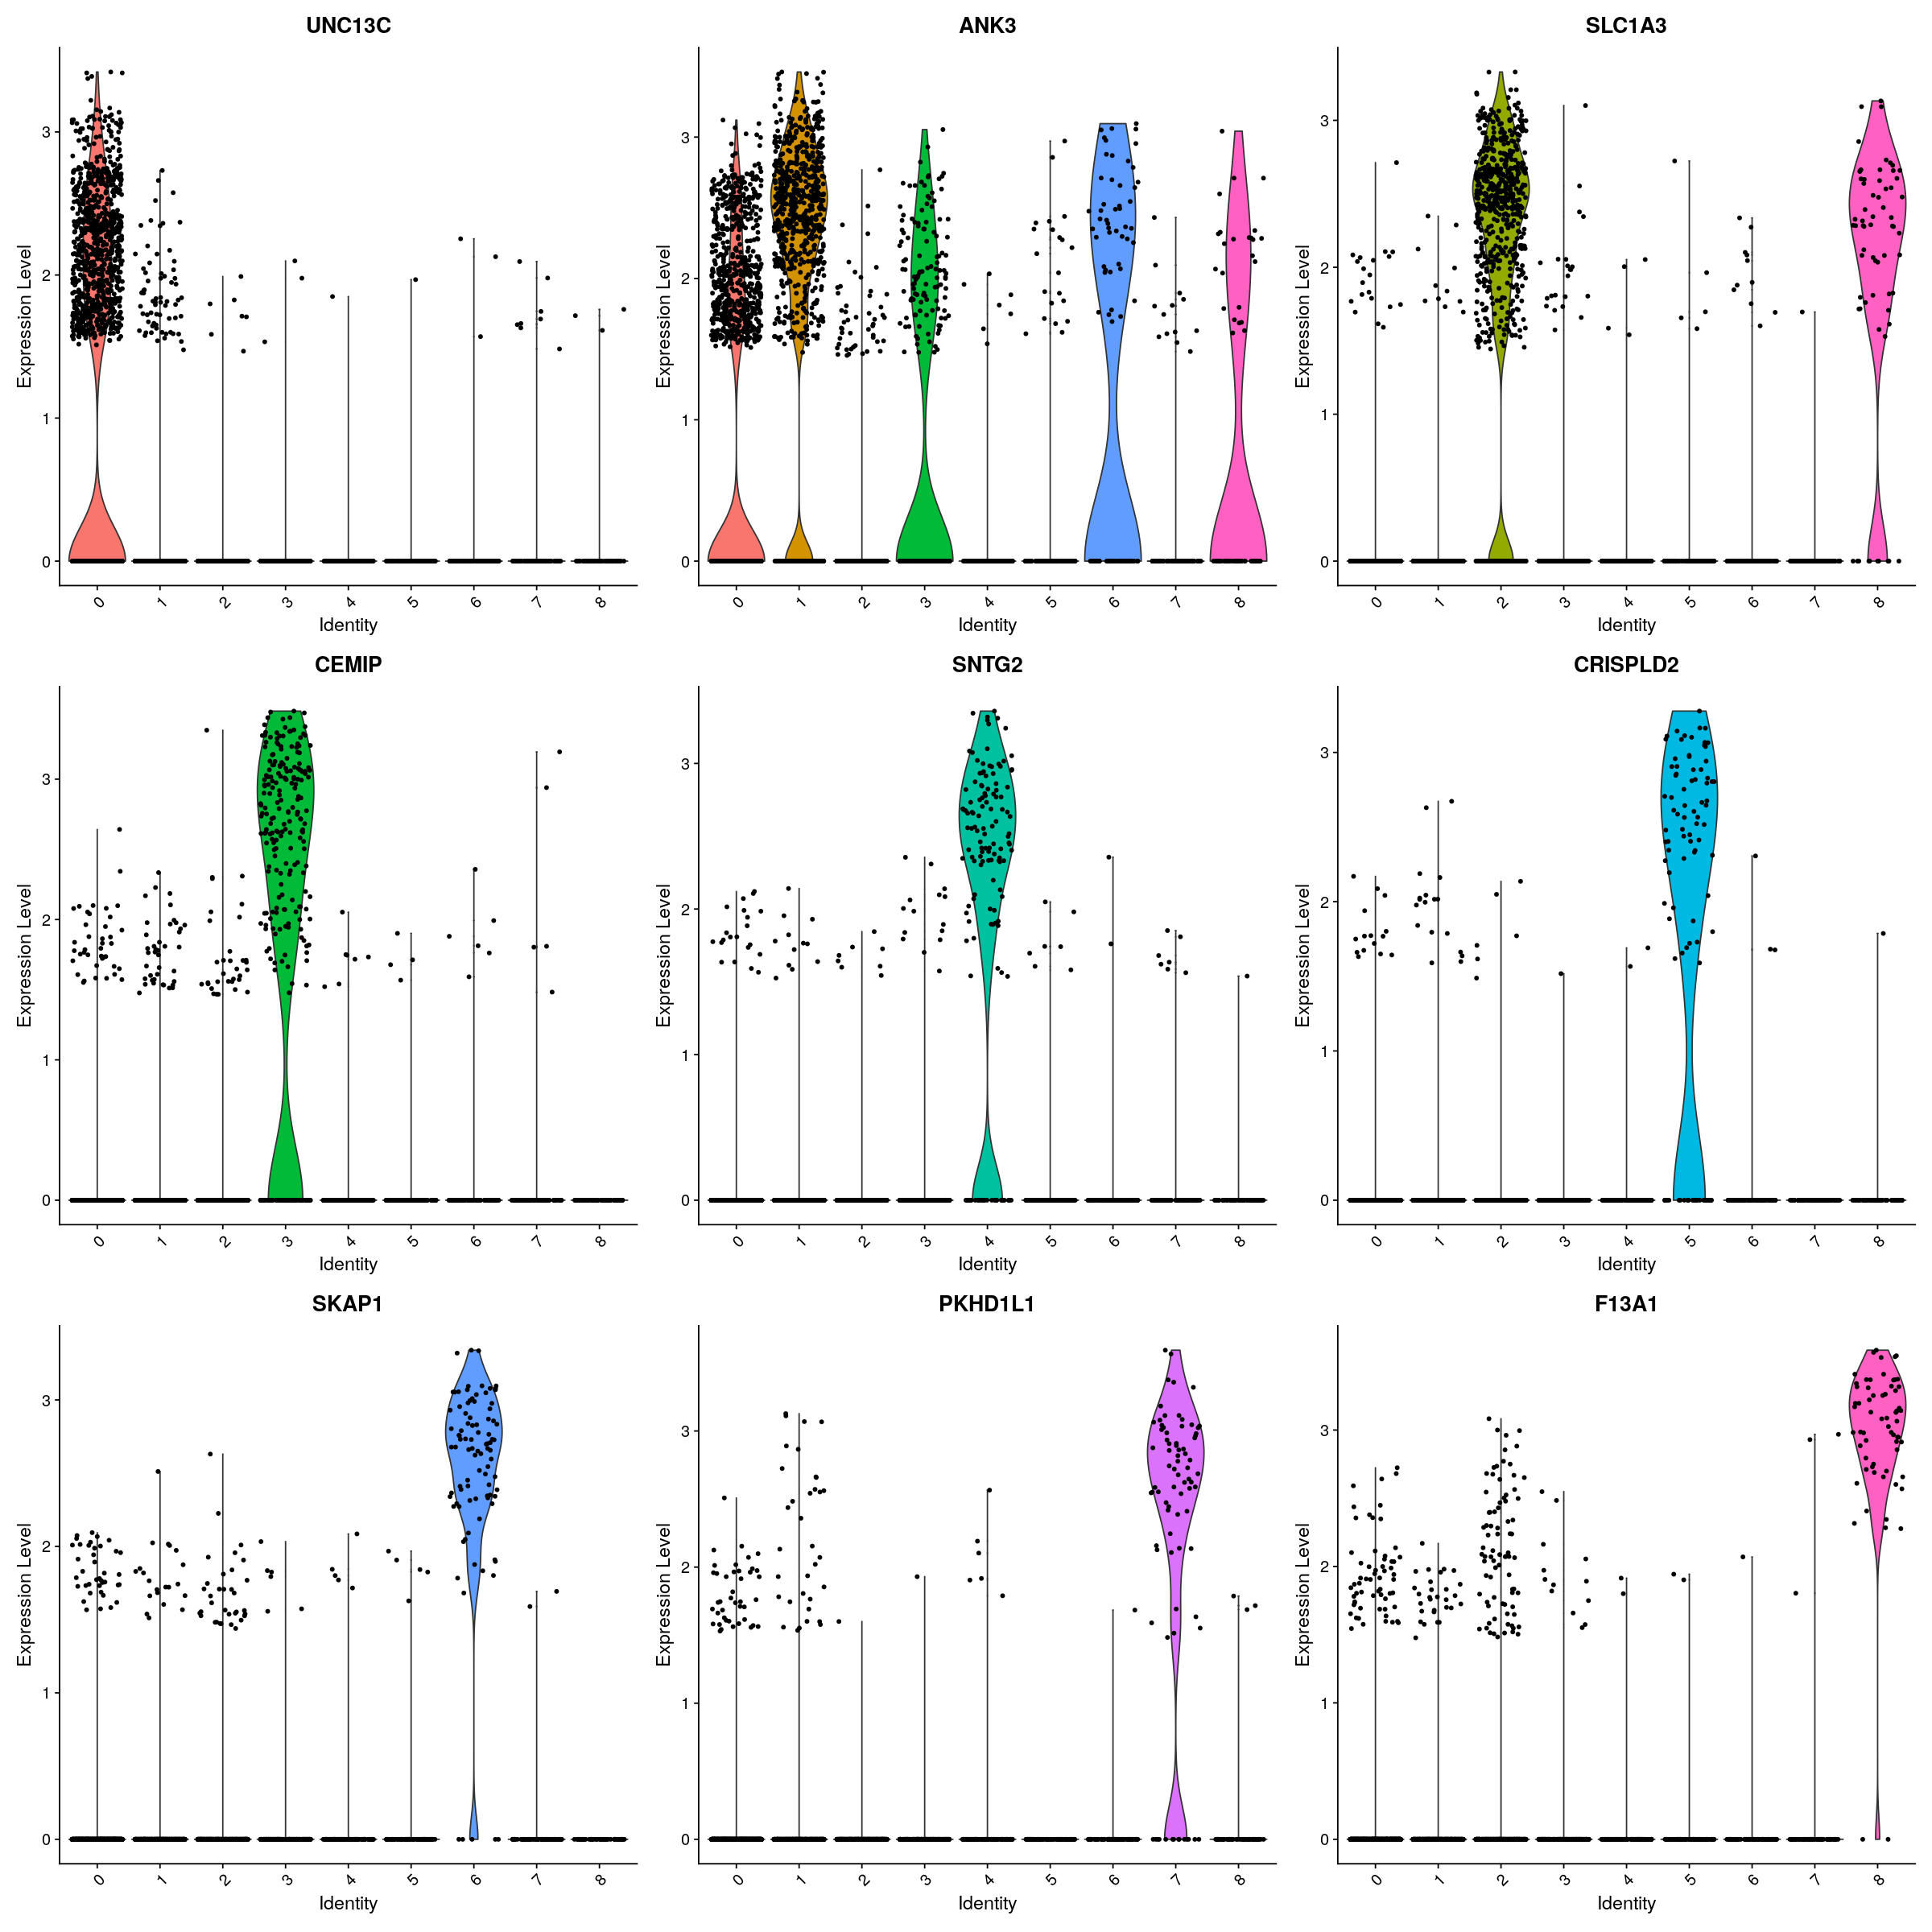

In [129]:
options(repr.plot.width=20, repr.plot.height=20)
top1 <- DEGs %>% group_by(cluster) %>% top_n(n = 1, wt = avg_logFC)
VlnPlot(seurat_object, features = top1$gene)

We can visualize the distribution of specific genes like HDAC9, which is one of markers in cluster 0, and the expression level is relatively high in cluster 2:

Picking joint bandwidth of 0.228



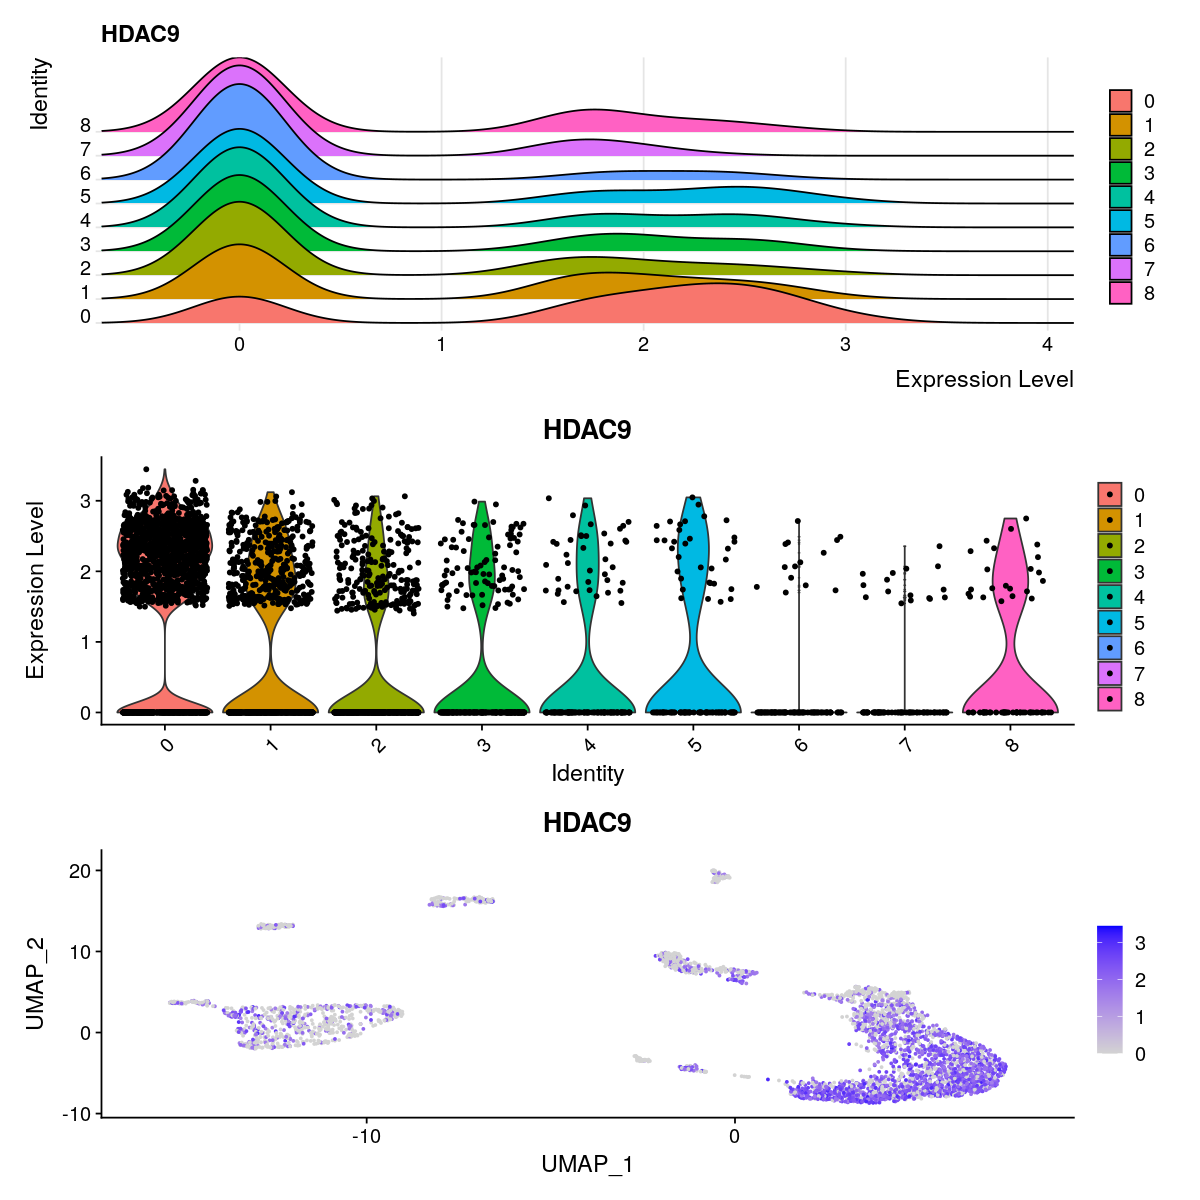

In [160]:
options(repr.plot.width=10, repr.plot.height=10)
plot1 <- RidgePlot(seurat_object, features = c("HDAC9"))
plot2 <- VlnPlot(seurat_object, features = c("HDAC9"))
plot3 <- FeaturePlot(seurat_object, features = c("HDAC9"))
plot1 + plot2 + plot3

So you can see the expression level of SDK1 is very high in cluster 0.

In [131]:
save(file = "seurat_object.RData", seurat_object)

### Cell type annotation

We can identify which cell type each of this clusters corresponds to.

We just need to check in the literature some of the markers we get are getting to see whether they are consistent/correct.

In [132]:
unique(seurat_object[['celltype']])

celltype              
AAACCCACAGACAAGC-1-0 Vascular Smooth Muscle
AAACCCATCTTACTGT-1-0 Fibroblast            
AAGTGAAAGCCTCTTC-1-0 Macrophage            
AATGAAGTCGAACGGA-1-0 Endothelial           
ACATCCCGTACTGCCG-1-0 Lymphocyte            
ATCGGCGCAAGACCGA-1-0 Pericyte              
ACATCCCAGGCTTTCA-1-4 Unknown1              
AGATCCACAATCCAGT-1-4 Unknown2

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


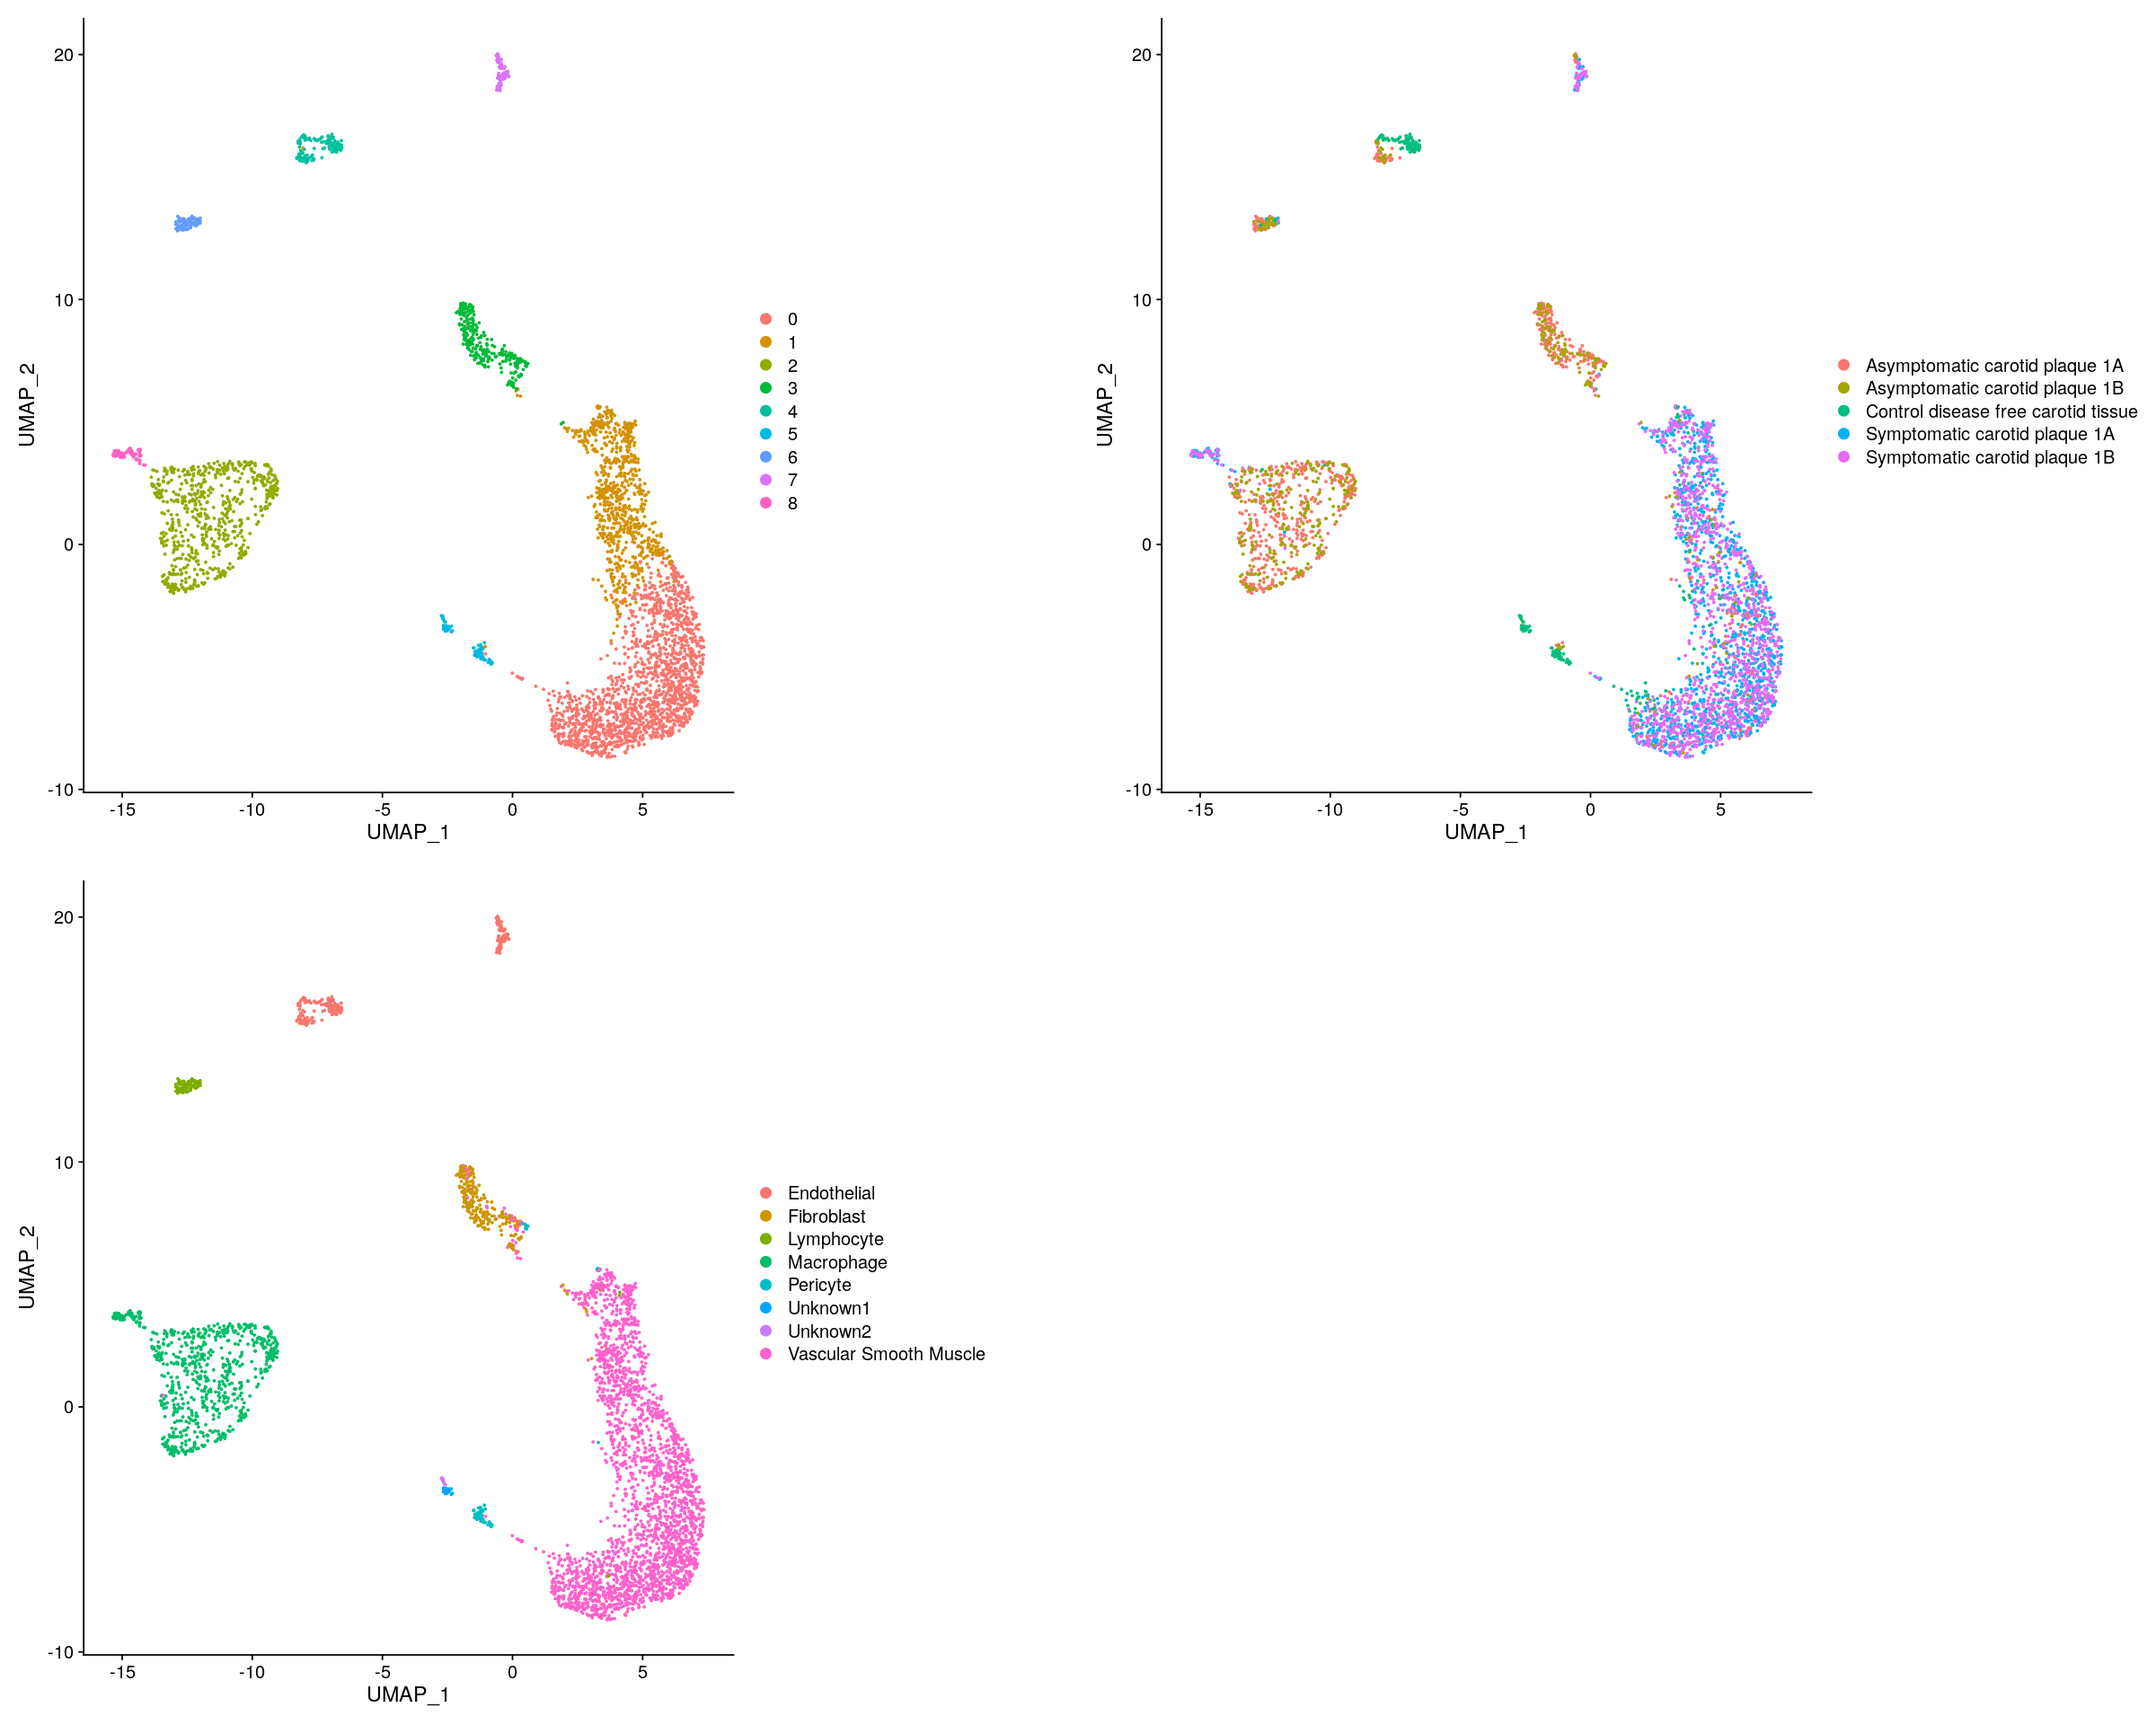

In [134]:
# Plot
options(repr.plot.width=20, repr.plot.height=16)
plot1 <- DimPlot(seurat_object, reduction = "umap")
plot2 <- DimPlot(seurat_object, reduction = "umap", group.by = "biosample_id")
plot3 <- DimPlot(seurat_object, reduction = "umap", group.by = "celltype")
CombinePlots(plots = list(plot1, plot2, plot3))

In [135]:
table(seurat_object[['celltype']][,1], Idents(seurat_object))

                        
                            0    1    2    3    4    5    6    7    8
  Endothelial               0    1    0    0  139    0    0   81    0
  Fibroblast                0   10    0  228    0    0    0    0    0
  Lymphocyte                2    2    0    0    0    0   92    0    0
  Macrophage                0    0  651    0    0    0    0    0   65
  Pericyte                  0    8    0    9    0   58    0    0    0
  Unknown1                  0    0    0    0    0   29    0    0    0
  Unknown2                  0    0    0    0    0   10    0    0    0
  Vascular Smooth Muscle 1640  750    2   36    0    1    1    0    0

We can see these 9 clusters can roughly match the celltype from the paper.

In the paper, HDAC9 is the marker of VSMC (Vascular Smooth Muscle Cell), VWF is the marker of Endothelial, RBM47 is the marker of Macrophage. Let's check these markers:

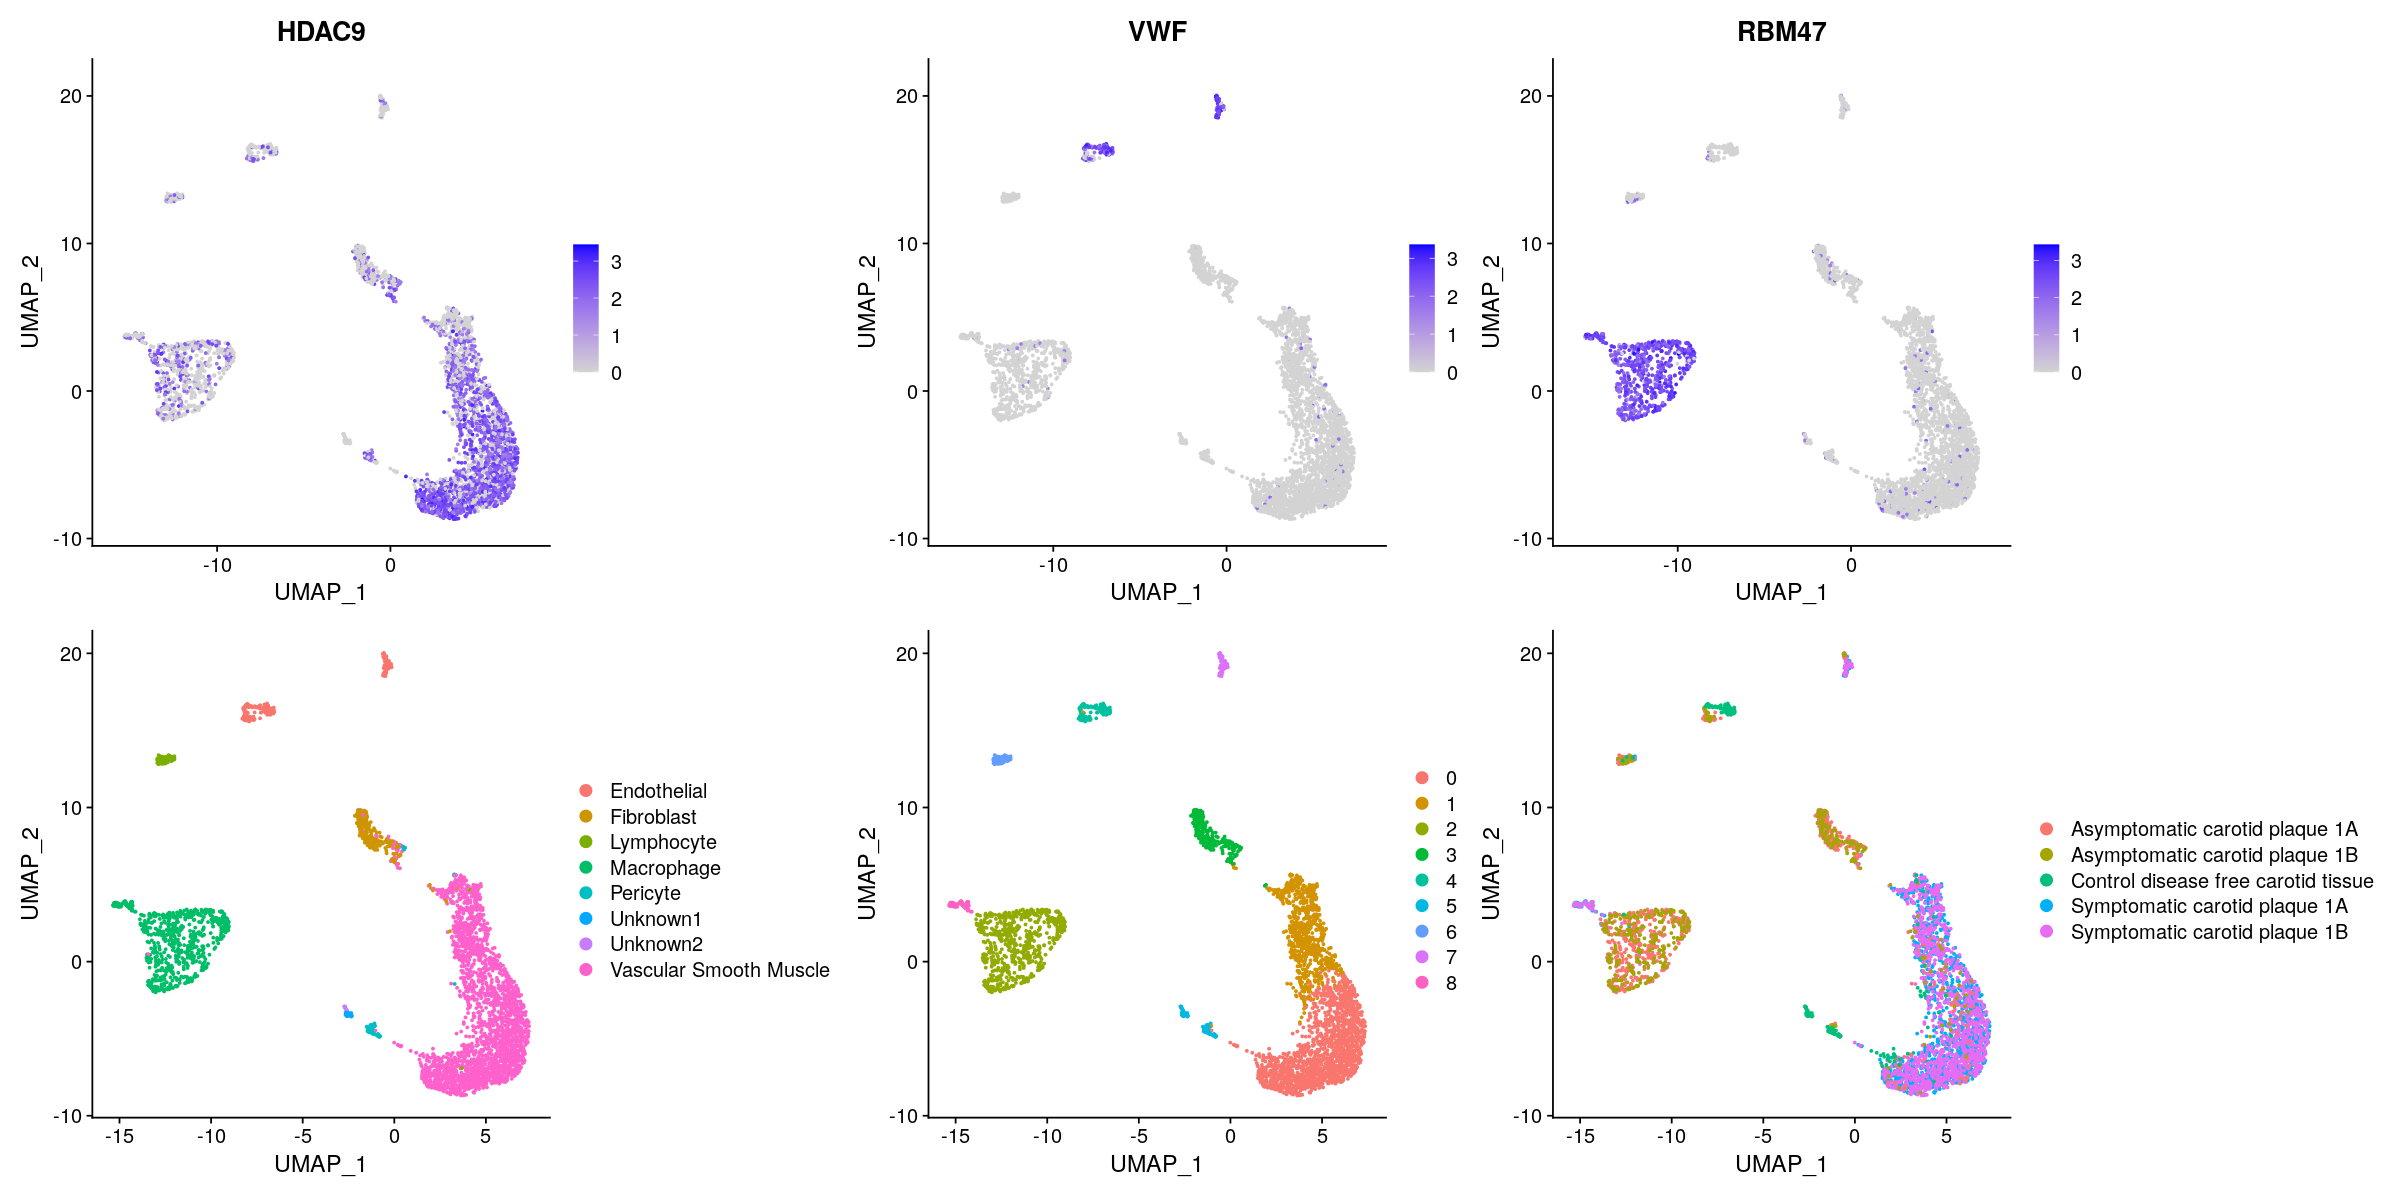

In [161]:
options(repr.plot.width=20, repr.plot.height=10)
plot1 <- FeaturePlot(seurat_object, features = c('HDAC9', 'VWF', 'RBM47'), ncol=3)
plot2 <- DimPlot(seurat_object, reduction = "umap", group.by = "celltype")
plot3 <- DimPlot(seurat_object, reduction = "umap")
plot4 <- DimPlot(seurat_object, reduction = "umap", group.by = "biosample_id")
plot1 + plot2 + plot3 + plot4

In [162]:
DEGs[DEGs$gene %in% c('HDAC9', 'VWF', 'RBM47'),]

p_val         avg_logFC pct.1 pct.2 p_val_adj     cluster gene 
HDAC9  1.162834e-144 0.7342819 0.766 0.385 1.881815e-140 0       HDAC9
RBM47   0.000000e+00 2.0520829 0.939 0.065  0.000000e+00 2       RBM47
VWF    1.604592e-262 1.9614880 0.784 0.040 2.596711e-258 4       VWF  
VWF1   2.714200e-238 2.3212605 0.951 0.048 4.392389e-234 7       VWF  
RBM471  6.274972e-55 1.4700328 0.938 0.202  1.015479e-50 8       RBM47

So as we can see, HDAC9 is included in clusters 0, which is also the clusters of VSMC; VWF is included in cluster 4,7, which is the clusters of Endothelial; RBM471 is included in clusters 2,8, which is the clusters of Macrophage.

Our results can match the paper analysis.

In [138]:
cbind(table(seurat_object[['celltype']][,1]))

[,1]
Endothelial             221
Fibroblast              238
Lymphocyte               96
Macrophage              716
Pericyte                 75
Unknown1                 29
Unknown2                 10
Vascular Smooth Muscle 2430

## Exporting a Seurat object to a loom file 

We can upload dataset to SCope for visualization and data exploration.

Firstly, make a loom file.

In [143]:
loom <- build_loom(file.name = "carotid_atherosclerosis.loom", 
                        dgem = as.matrix(seurat_object[["RNA"]]@counts),
                        title = "Carotid Atherosclerosis Dataset",
                        genome="Human",
                        default.embedding = seurat_object@reductions$umap@cell.embeddings,
                        default.embedding.name = "Umap")

[1] "Adding global attributes..."
[1] "Adding matrix..."
  |======================================================================| 100%[1] "Adding column attributes..."
[1] "Adding default metrics nUMI..."
[1] "Adding default metrics nGene..."
[1] "Adding default embedding..."
[1] "Adding row attributes..."
[1] "Adding columns graphs..."
[1] "Adding row graphs..."
[1] "Adding layers..."


In [144]:
marker_file_list <- list(RNA_snn_res.0.2 = "DEG.rds") # feel free to add more resolutions

add_seurat_clustering(loom, 
                      seurat = seurat_object,
                      seurat.assay = "RNA",
                      default.clustering.resolution = 0.2,
                      seurat.clustering.prefix = "RNA_snn_res.",
                      seurat.markers.file.path.list = marker_file_list)

[1] "Seurat, RNA_snn_res.0.2"
[1] "Adding Seurat clusters..."
[1] "Adding default Seurat clusters..."
[1] "Clusterings created..."
[1] "Clustering ID: 0"
[1] "Adding Seurat markers..."
[1] "Adding markers for clustering 0..."
[1] "Seurat, RNA_snn_res.1"
[1] "Adding Seurat clusters..."
[1] "Clusterings already exists..."
[1] "Clustering ID: 1"
[1] "Adding Seurat markers..."


Warning message in add_seurat_clustering(loom, seurat = seurat_object, seurat.assay = "RNA", :
“Seurat markers for clustering resolution 1 have not been computed.”


[1] "Seurat, RNA_snn_res.2"
[1] "Adding Seurat clusters..."
[1] "Clusterings already exists..."
[1] "Clustering ID: 2"
[1] "Adding Seurat markers..."


Warning message in add_seurat_clustering(loom, seurat = seurat_object, seurat.assay = "RNA", :
“Seurat markers for clustering resolution 2 have not been computed.”


Add further annotations:

In [145]:
colnames(seurat_object[[]])

[1] "orig.ident"      "nCount_RNA"      "nFeature_RNA"    "biosample_id"   
 [5] "donor_id"        "celltype"        "AllData"         "percent.mt"     
 [9] "RNA_snn_res.0.2" "RNA_snn_res.1"   "RNA_snn_res.2"   "seurat_clusters"

In [146]:
# Annotations: Categorical values
for(keyName in c('biosample_id', 'celltype'))
{
    message('Adding', keyName, '...')
    add_col_attr(loom, key = keyName,
                value = as.vector(seurat_object[[keyName]][,1]),
                as.annotation = TRUE)
}

# Numericc values (annotation=FALSE)
for(keyName in c('nCount_RNA', 'percent.mt'))
{
    message('Adding', keyName, '...')
    add_col_attr(loom, key = keyName,
                value = as.vector(seurat_object[[keyName]][,1]),
                as.annotation = FALSE)
}

Addingbiosample_id...

Addingcelltype...

AddingnCount_RNA...

Addingpercent.mt...



In [147]:
finalize(loom)

We can upload the loom file to http://scope.aertslab.org/.

Expect for VSMs, we want to identify other cells expressing HDAC9

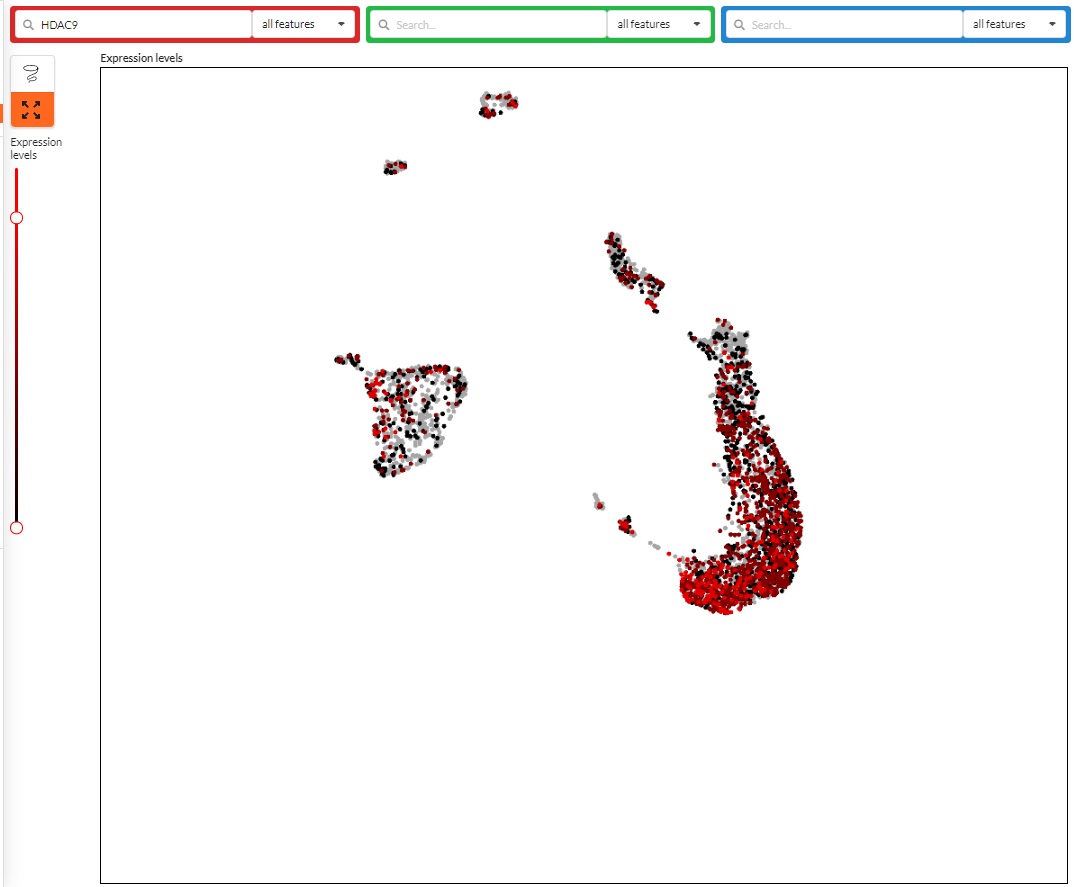

We can also show the annotation of celltype:

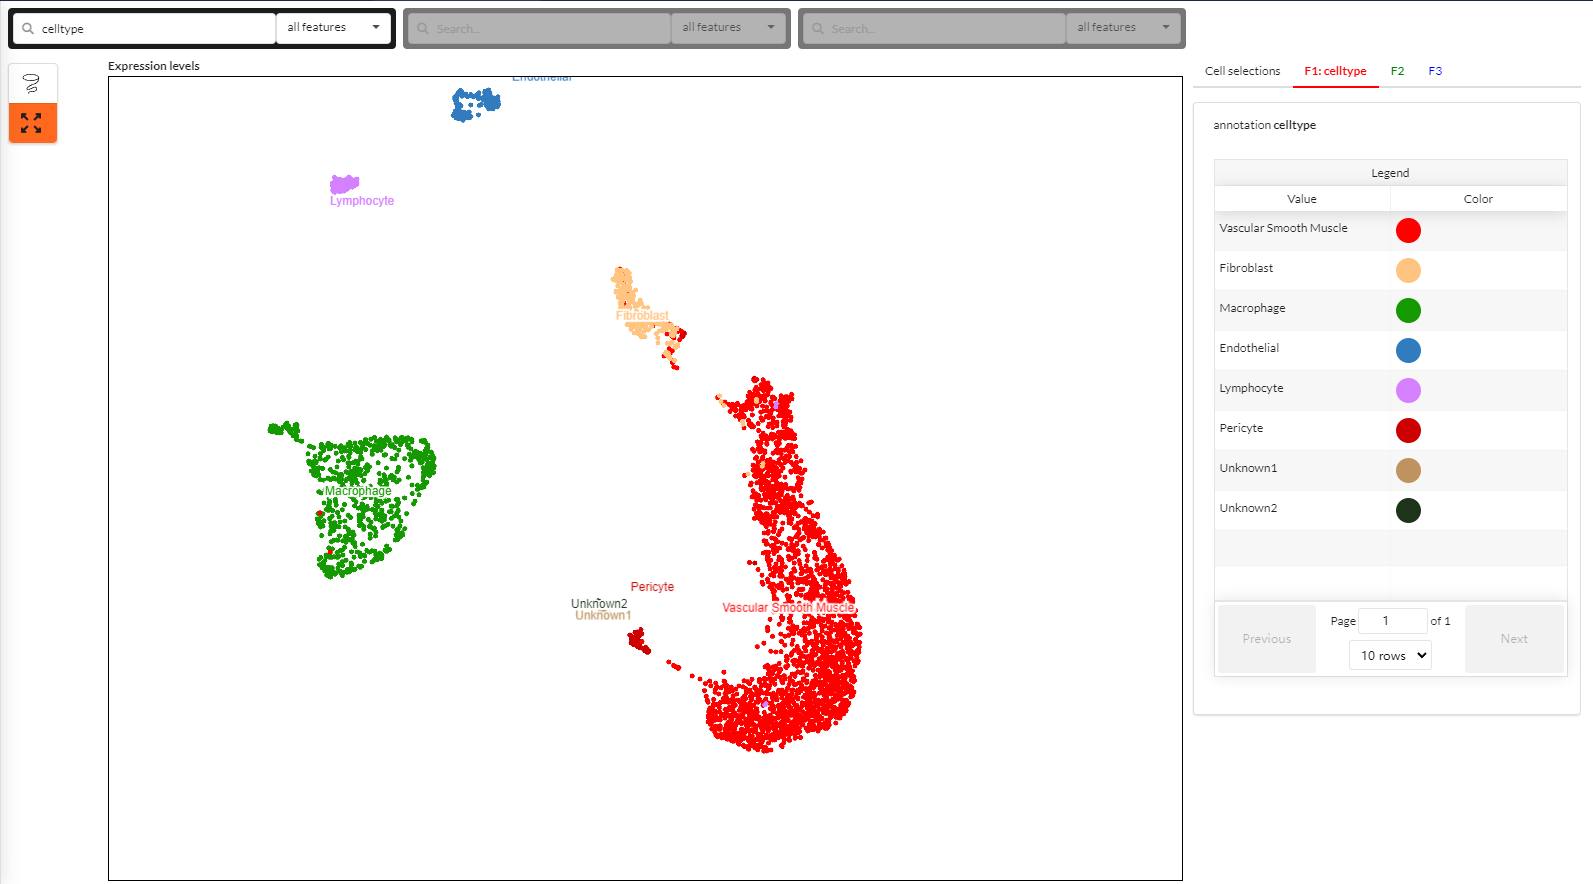

We can also compare HADC9 expression between different celltypes, for example: HDAC9 in VSMs, Fibroblast, Macrophage and Endothelial

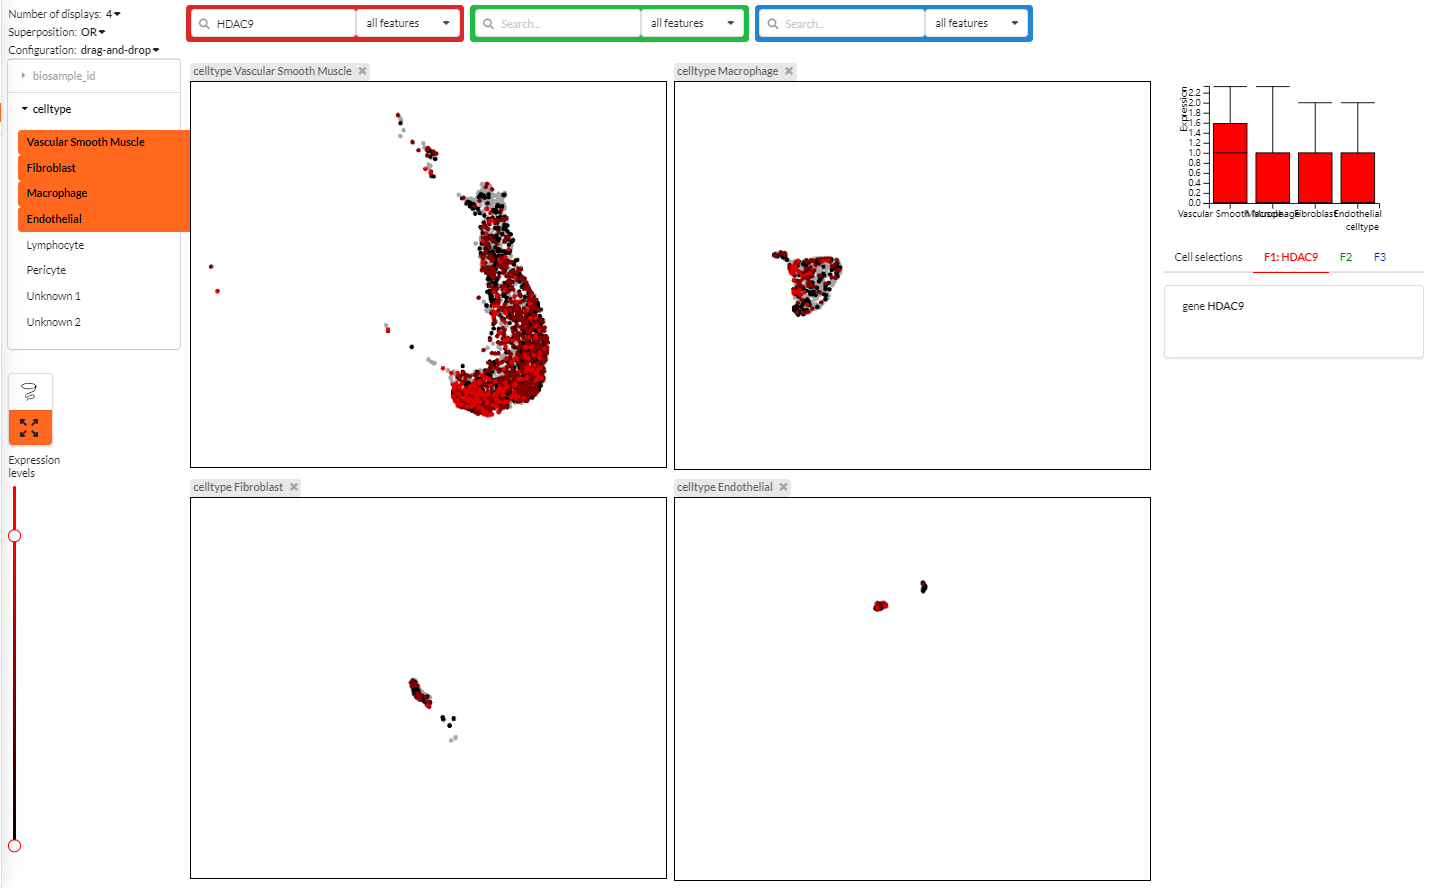

In conclusion, except for VSMs cells, HDAC9 expression is relatively high in cluster of Macrophage, which means the recruitment of macrophages might be modulated by HDAC9 expression. This discovery matches the result of paper ([Chou et al., 2022](https://www-sciencedirect-com.kuleuven.e-bronnen.be/science/article/pii/S2666350321000456)), they found that carotid VSMCs express HDAC9 and genes typically associated with immune characteristics. Using cellular assays, they have demonstrated that recruitment of macrophages can be modulated by HDAC9 expression. HDAC9 expression might affect carotid plaque stability and progression through its effects on the VSMC phenotype and recruitment of immune cells.